# ECEN 758 Data Mining and Analysis Project - Fall 2025

**Due Date:** November 25, 2025, 11:59 PM CST

**Team Members:**
- Banghyon Lee
- Fahimeh Orvati Nia
- Nandhini Valiveti
- Sushma perati

**Dataset:** ESC -50

## ESC-50 Dataset Explained

The ESC-50 dataset is a labeled collection of 2000 environmental sound recordings, each 5 seconds long. It is divided into 50 classes, with 40 examples per class. The dataset is pre-arranged into 5 folds for cross-validation. The classes are grouped into 5 major categories: Animals, Natural soundscapes & water, Human non-speech sounds, Interior/domestic sounds, and Exterior/urban sounds. This dataset is commonly used for environmental sound classification tasks.

# ECEN 758 Data Mining and Analysis Project - Fall 2025

**Due Date:** November 25, 2025, 11:59 PM CST

**Team Members:**
- Banghyon Lee
- Fahimeh Orvati Nia
- Nandhini Valiveti
- Sushma perati

**Dataset:** ESC -50

## 1. Project Setup and Data Download

This section handles the initial setup, including installing necessary libraries and downloading and extracting the ESC-50 dataset.

## 2. Data Loading and Initial Exploration

The ESC-50 dataset is a labeled collection of 2000 environmental sound recordings, each 5 seconds long. It is divided into 50 classes, with 40 examples per class. The dataset is pre-arranged into 5 folds for cross-validation. The classes are grouped into 5 major categories: Animals, Natural soundscapes & water, Human non-speech sounds, Interior/domestic sounds, and Exterior/urban sounds. This dataset is commonly used for environmental sound classification tasks.

Here, we load the dataset metadata and perform an initial exploration to understand its structure and content, including the explanation of each column.

### ESC-50 Dataset Column Explanation

Here is a breakdown of the columns in the ESC-50 dataset metadata:

*   **filename**: The name of the audio file.
*   **fold**: Indicates which of the 5 cross-validation folds the file belongs to.
*   **target**: A numerical label representing the category of the sound.
*   **category**: The name of the environmental sound category (e.g., 'dog', 'thunderstorm').
*   **esc10**: A boolean indicating if the sound belongs to one of the 10 core environmental sound classes (True) or the other 40 classes (False).
*   **src_file**: An identifier for the source recording from which the 5-second clip was extracted.
*   **take**: Indicates which 5-second segment (take) was extracted from the source file, especially if multiple clips were taken from the same source.

There are 2000 audio files and 50 distinct categories in the dataset.

## 3. Data Preprocessing and Feature Extraction

In [ ]:
# Install necessary libraries and download the ESC-50 dataset
!pip install librosa
!pip install scikit-learn

!wget https://github.com/karolpiczak/ESC-50/archive/master.zip -O ESC-50.zip
!unzip ESC-50.zip
!mv ESC-50-master ESC-50_data

--2025-11-17 16:12:41--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-11-17 16:12:42--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘ESC-50.zip’

ESC-50.zip              [            <=>     ] 615.78M  14.3MB/s    in 41s     

2025-11-17 16:13:23 (15.2 MB/s) - ‘ESC-50.zip’ saved [645695005]

Archive:  ESC-50.zip
33c8ce9eb2cf0b1c2f8bcf322eb349b6be34dbb6
   creating: ESC-50-master/
   creating: ESC-50-master/.circleci/
  inflating: E

In [ ]:
# Load metadata and display the head of the dataframe
import os, numpy as np, pandas as pd, librosa, soundfile as sf, pathlib
from sklearn.model_selection import GroupKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tqdm import tqdm

# ESC-50 Meta Data & Autio Data
META_CSV = 'ESC-50_data/meta/esc50.csv'
AUDIO_DIR = 'ESC-50_data/audio'
df = pd.read_csv(META_CSV)
display(df.head(10))

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [ ]:
# Display all unique categories
display(list(df['category'].unique()))

['dog',
 'chirping_birds',
 'vacuum_cleaner',
 'thunderstorm',
 'door_wood_knock',
 'can_opening',
 'crow',
 'clapping',
 'fireworks',
 'chainsaw',
 'airplane',
 'mouse_click',
 'pouring_water',
 'train',
 'sheep',
 'water_drops',
 'church_bells',
 'clock_alarm',
 'keyboard_typing',
 'wind',
 'footsteps',
 'frog',
 'cow',
 'brushing_teeth',
 'car_horn',
 'crackling_fire',
 'helicopter',
 'drinking_sipping',
 'rain',
 'insects',
 'laughing',
 'hen',
 'engine',
 'breathing',
 'crying_baby',
 'hand_saw',
 'coughing',
 'glass_breaking',
 'snoring',
 'toilet_flush',
 'pig',
 'washing_machine',
 'clock_tick',
 'sneezing',
 'rooster',
 'sea_waves',
 'siren',
 'cat',
 'door_wood_creaks',
 'crickets']

In [ ]:
META_CSV = 'ESC-50_data/meta/esc50.csv'
AUDIO_DIR = 'ESC-50_data/audio'
df = pd.read_csv(META_CSV)


In [ ]:
# --- Imports ---
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import joblib

# --- Paths ---
META_CSV = 'ESC-50_data/meta/esc50.csv'
AUDIO_DIR = 'ESC-50_data/audio'
os.makedirs("data_out", exist_ok=True)

# --- Load metadata ---
meta = pd.read_csv(META_CSV)
print("Loaded:", meta.shape, "files")

# --- Feature extraction function ---
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    # Basic time trimming (optional)
    if len(y) > sr*5:
        y = y[:sr*5]

    # Core features
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)

    # Combine all into one feature vector
    features = np.hstack([mfcc, chroma, mel, contrast, tonnetz])
    return features

# --- Extract features for all audio files ---
all_features = []
for _, row in tqdm(meta.iterrows(), total=len(meta)):
    file_path = os.path.join(AUDIO_DIR, row["filename"])
    feats = extract_features(file_path)
    all_features.append({
        "filename": row["filename"],
        "target": row["target"],
        "label": row["category"],
        **{f"f{i}": feats[i] for i in range(len(feats))}
    })

df = pd.DataFrame(all_features)
print("Raw feature matrix shape:", df.shape)
df.to_csv("data_out/esc50_features_raw.csv", index=False)
print("Saved raw feature file.")

Loaded: (2000, 7) files


 14%|█▍        | 286/2000 [03:55<21:31,  1.33it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 2000/2000 [25:52<00:00,  1.29it/s]


Raw feature matrix shape: (2000, 176)
Saved raw feature file.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the raw features from the CSV file
df_raw = pd.read_csv("data_out/esc50_features_raw.csv")

# Drop the 'filename' column as it's not a feature and causing the error
df_features_only = df_raw.drop(columns=['filename'])

feature_cols = [c for c in df_features_only.columns if c.startswith("f")]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_features_only[feature_cols])

# Create a new DataFrame with normalized features and include target and label from the original raw data
normalized_df = pd.DataFrame(normalized_features, columns=feature_cols)
normalized_df['target'] = df_raw['target']
normalized_df['label'] = df_raw['label']

normalized_df.to_csv("data_out/esc50_features_normalized_corrected.csv", index=False)
joblib.dump(scaler, "data_out/scaler_corrected.pkl")
print(" Saved corrected normalized dataset + scaler")

 Saved corrected normalized dataset + scaler


This code snippet performs feature normalization using `StandardScaler`.

1.  **Loads Raw Features**: It first loads the raw features that were extracted and saved to a CSV file in the previous step.
2.  **Drops 'filename' Column**: The 'filename' column is removed because it is a non-numeric identifier and cannot be used in the scaling process. This was the cause of the previous error.
3.  **Selects Feature Columns**: It identifies all columns that start with 'f' as the feature columns.
4.  **Applies StandardScaler**: A `StandardScaler` is initialized and fitted to the selected feature columns. This process calculates the mean and standard deviation of each feature and then transforms the data so that each feature has a mean of 0 and a standard deviation of 1.
5.  **Creates Normalized DataFrame**: A new DataFrame is created with the normalized feature data. The 'target' and 'label' columns from the original raw data are added back to this new DataFrame.
6.  **Saves Normalized Data and Scaler**: The normalized DataFrame is saved to a new CSV file (`esc50_features_normalized_corrected.csv`), and the fitted `StandardScaler` object is saved to a file (`scaler_corrected.pkl`). Saving the scaler is important because it can be used later to apply the same normalization to any new data you want to classify.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
X = df[feature_cols]
y = df['target']
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=feature_cols).sort_values(ascending=False)
top_features = mi_series.head(100).index.tolist()  # keep top 100 features
df_selected = df[['filename', 'target', 'label'] + top_features]
df_selected.to_csv("data_out/esc50_features_selected.csv", index=False)
print(" Saved selected feature file:", df_selected.shape)


 Saved selected feature file: (2000, 103)


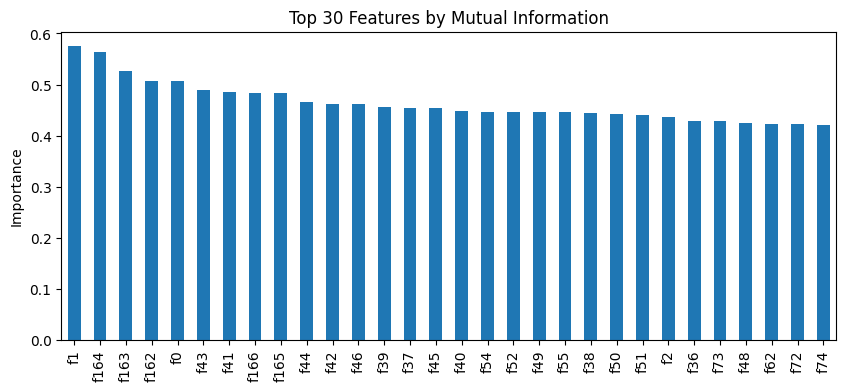

In [ ]:
import matplotlib.pyplot as plt
mi_series.head(30).plot(kind='bar', figsize=(10,4))
plt.title("Top 30 Features by Mutual Information")
plt.ylabel("Importance")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(df[feature_cols])
df_pca = pd.concat([
    df[['filename', 'target', 'label']],
    pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(50)])
], axis=1)

df_pca.to_csv("data_out/esc50_features_pca.csv", index=False)
print("PCA-reduced dataset saved:", df_pca.shape)


PCA-reduced dataset saved: (2000, 53)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
import seaborn as sns

# --- Load features ---
df = pd.read_csv("data_out/esc50_features_selected.csv")  # or normalized version
X = df.drop(columns=["filename", "target", "label"])
y = df["target"]
labels = df["label"]

# --- PCA ---
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance (3 components):", np.sum(pca.explained_variance_ratio_))


Explained variance ratios: [0.3117396  0.21953717 0.12986936]
Total explained variance (3 components): 0.6611461303985838


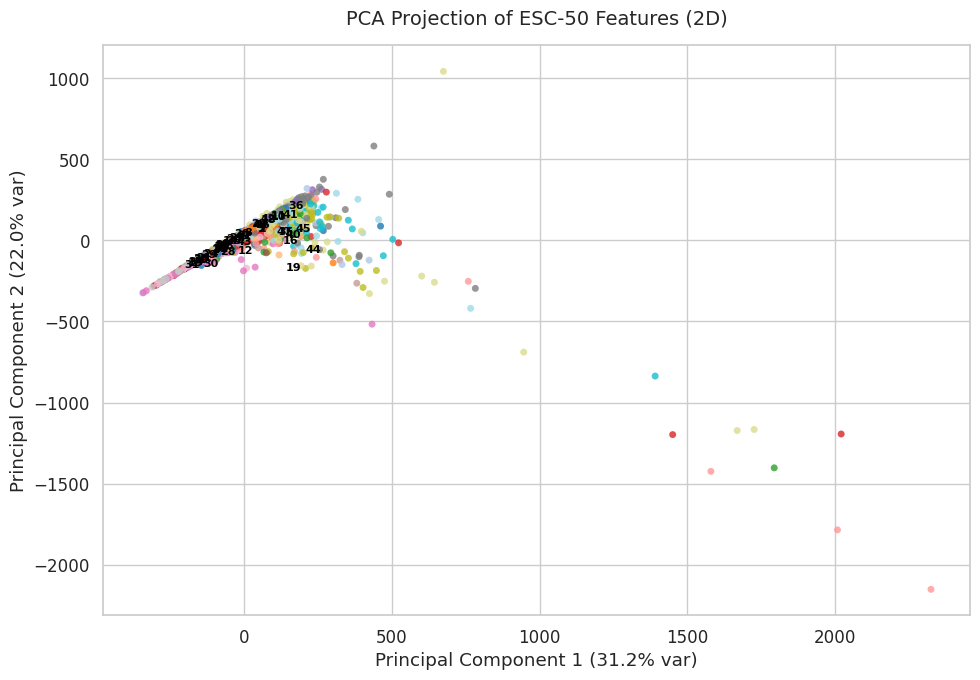

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("tab20", n_colors=20)  # reuse colors across 50 classes

# Scatter plot of first two components
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=y, cmap='tab20', s=25, alpha=0.8, edgecolors='none')

plt.title("PCA Projection of ESC-50 Features (2D)", fontsize=14, pad=15)
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.tight_layout()

# Optional: annotate centroids of each category
centroids = pd.DataFrame(X_pca[:,0:2], columns=["PC1","PC2"]).groupby(y).mean()
for i, (x,yc) in enumerate(zip(centroids.PC1, centroids.PC2)):
    plt.text(x, yc, str(i), fontsize=8, weight='bold', color='black', ha='center', va='center')

plt.show()


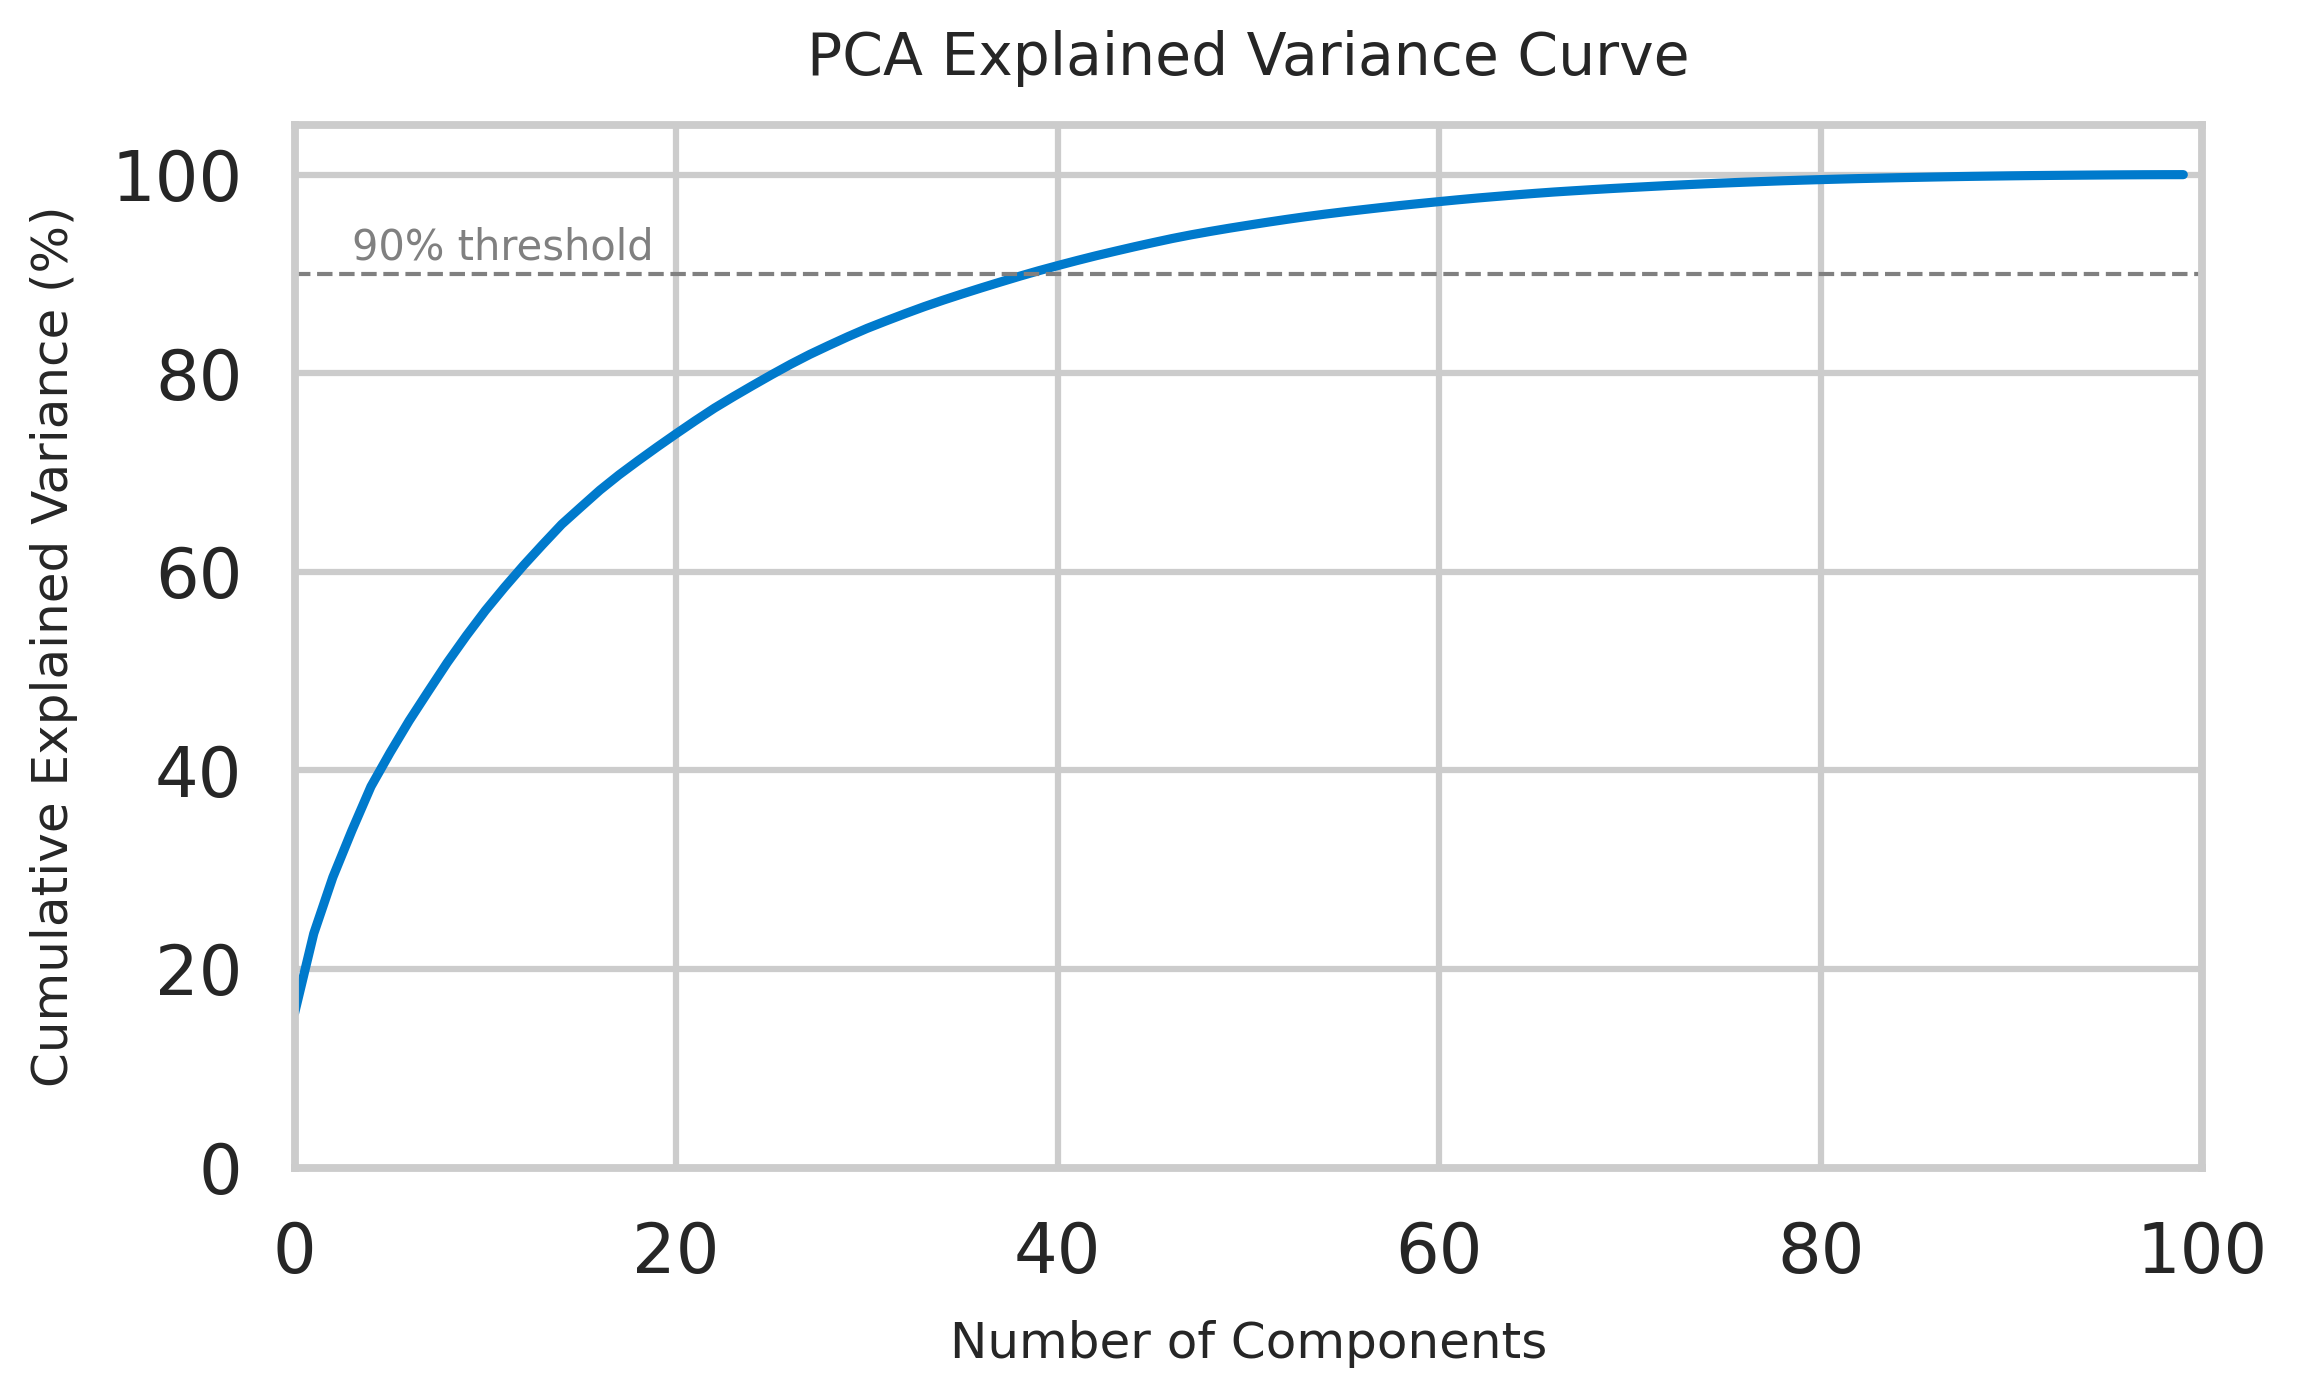

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load features ---
df = pd.read_csv("data_out/esc50_features_selected.csv")
X_scaled = df.drop(columns=["filename", "target", "label"]).values  # define X_scaled from your dataframe

# --- Normalize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

# --- Fit PCA ---
pca_full = PCA()
pca_full.fit(X_scaled)   # Use your normalized feature matrix

# --- Plot ---
sns.set_context("talk", font_scale=1.0)
sns.set_style("whitegrid")

plt.figure(figsize=(8,5), dpi=300)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_) * 100, lw=2.2, color="#007acc")
plt.xlabel("Number of Components", fontsize=12, labelpad=8)
plt.ylabel("Cumulative Explained Variance (%)", fontsize=12, labelpad=8)
plt.title("PCA Explained Variance Curve", fontsize=14, pad=12)
plt.axhline(90, color="gray", ls="--", lw=1)
plt.text(3, 91.5, "90% threshold", color="gray", fontsize=10)
plt.xlim(0, len(pca_full.explained_variance_ratio_))
plt.ylim(0, 105)
plt.tight_layout()
plt.savefig("PCA_explained_variance_curve.png", dpi=400, bbox_inches="tight")
plt.show()


In [ ]:
import plotly.express as px
df_plot = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
df_plot['label'] = labels
fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='label',
                    title='ESC-50 PCA 3D Visualization', opacity=0.7)
fig.update_traces(marker=dict(size=4))
fig.show()


Loaded RAW from data_out/esc50_features_raw.csv  ->  shape = (2000, 176)
RAW: X.shape = (2000, 173), y.shape = (2000,), num_features = 173
Loaded NORMALIZED from data_out/esc50_features_normalized_corrected.csv  ->  shape = (2000, 175)
NORMALIZED: X.shape = (2000, 173), y.shape = (2000,), num_features = 173
Loaded SELECTED from data_out/esc50_features_selected.csv  ->  shape = (2000, 103)
SELECTED: X.shape = (2000, 100), y.shape = (2000,), num_features = 100

================ SVM Linear on Raw =================
Train accuracy: 1.0000
Test  accuracy: 0.5050
Precision (macro): 0.5304
Recall    (macro): 0.5050
F1-score  (macro): 0.4952

Classification report (test set):
              precision    recall  f1-score   support

           0      0.455     0.625     0.526         8
           1      0.700     0.875     0.778         8
           2      0.429     0.375     0.400         8
           3      0.625     0.625     0.625         8
           4      0.545     0.750     0.632         8

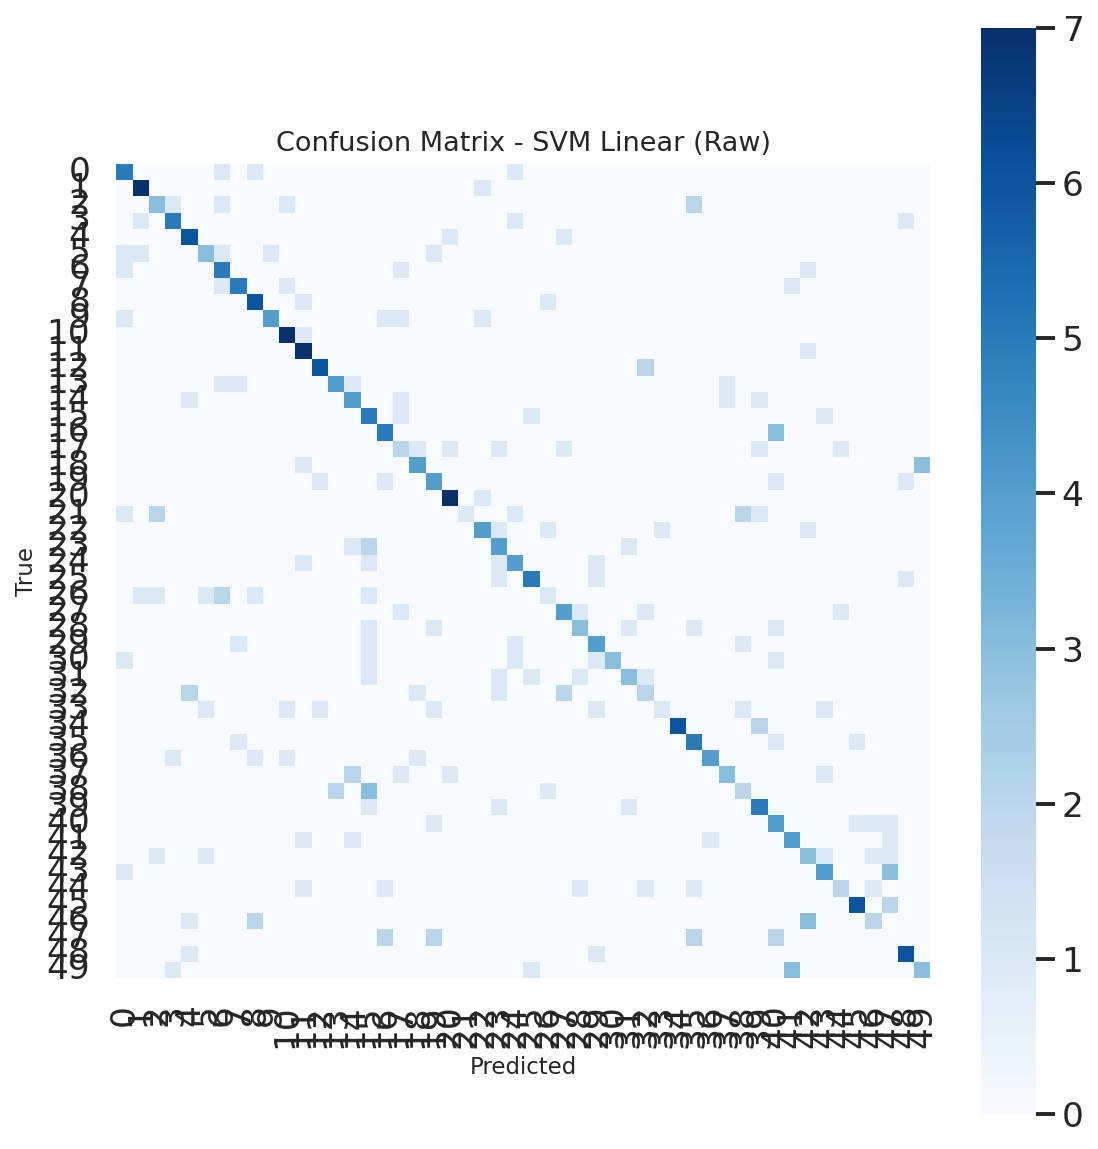


================ SVM RBF on Raw =================
Train accuracy: 0.5394
Test  accuracy: 0.3925
Precision (macro): 0.4392
Recall    (macro): 0.3925
F1-score  (macro): 0.3846

Classification report (test set):
              precision    recall  f1-score   support

           0      0.556     0.625     0.588         8
           1      0.500     0.500     0.500         8
           2      0.800     0.500     0.615         8
           3      0.667     0.250     0.364         8
           4      1.000     0.500     0.667         8
           5      0.167     0.125     0.143         8
           6      0.800     0.500     0.615         8
           7      0.182     0.250     0.211         8
           8      0.385     0.625     0.476         8
           9      1.000     0.625     0.769         8
          10      0.800     1.000     0.889         8
          11      0.455     0.625     0.526         8
          12      0.625     0.625     0.625         8
          13      0.667     0.250

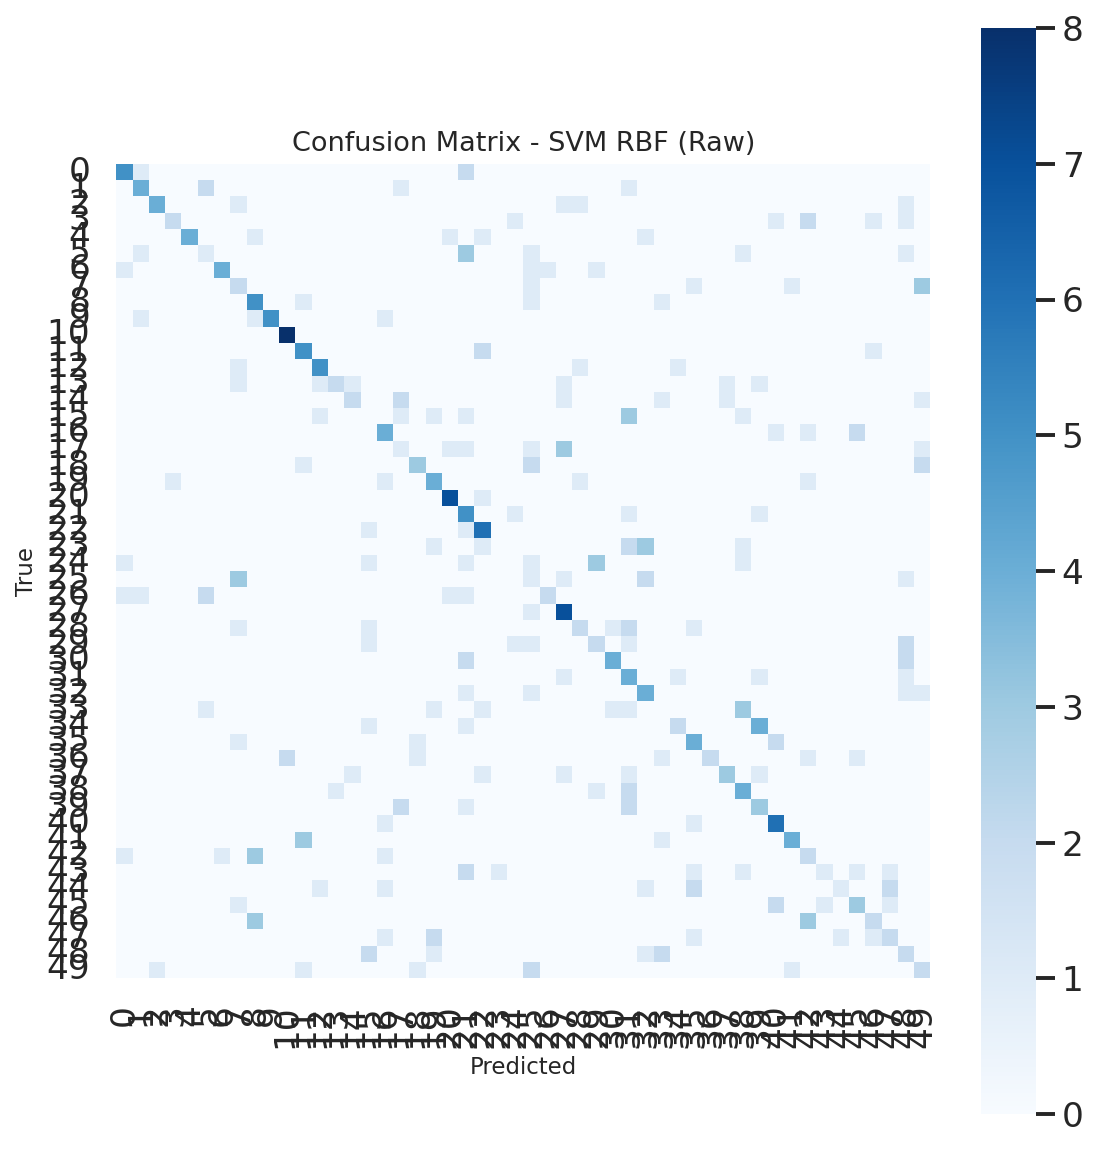


================ MLP on Raw =================
Train accuracy: 0.8650
Test  accuracy: 0.4900
Precision (macro): 0.5356
Recall    (macro): 0.4900
F1-score  (macro): 0.4762

Classification report (test set):
              precision    recall  f1-score   support

           0      0.429     0.750     0.545         8
           1      0.462     0.750     0.571         8
           2      1.000     0.250     0.400         8
           3      0.600     0.750     0.667         8
           4      1.000     0.625     0.769         8
           5      0.500     0.625     0.556         8
           6      0.250     0.125     0.167         8
           7      0.538     0.875     0.667         8
           8      0.750     0.750     0.750         8
           9      1.000     0.375     0.545         8
          10      0.700     0.875     0.778         8
          11      1.000     0.750     0.857         8
          12      1.000     0.250     0.400         8
          13      0.571     0.500    

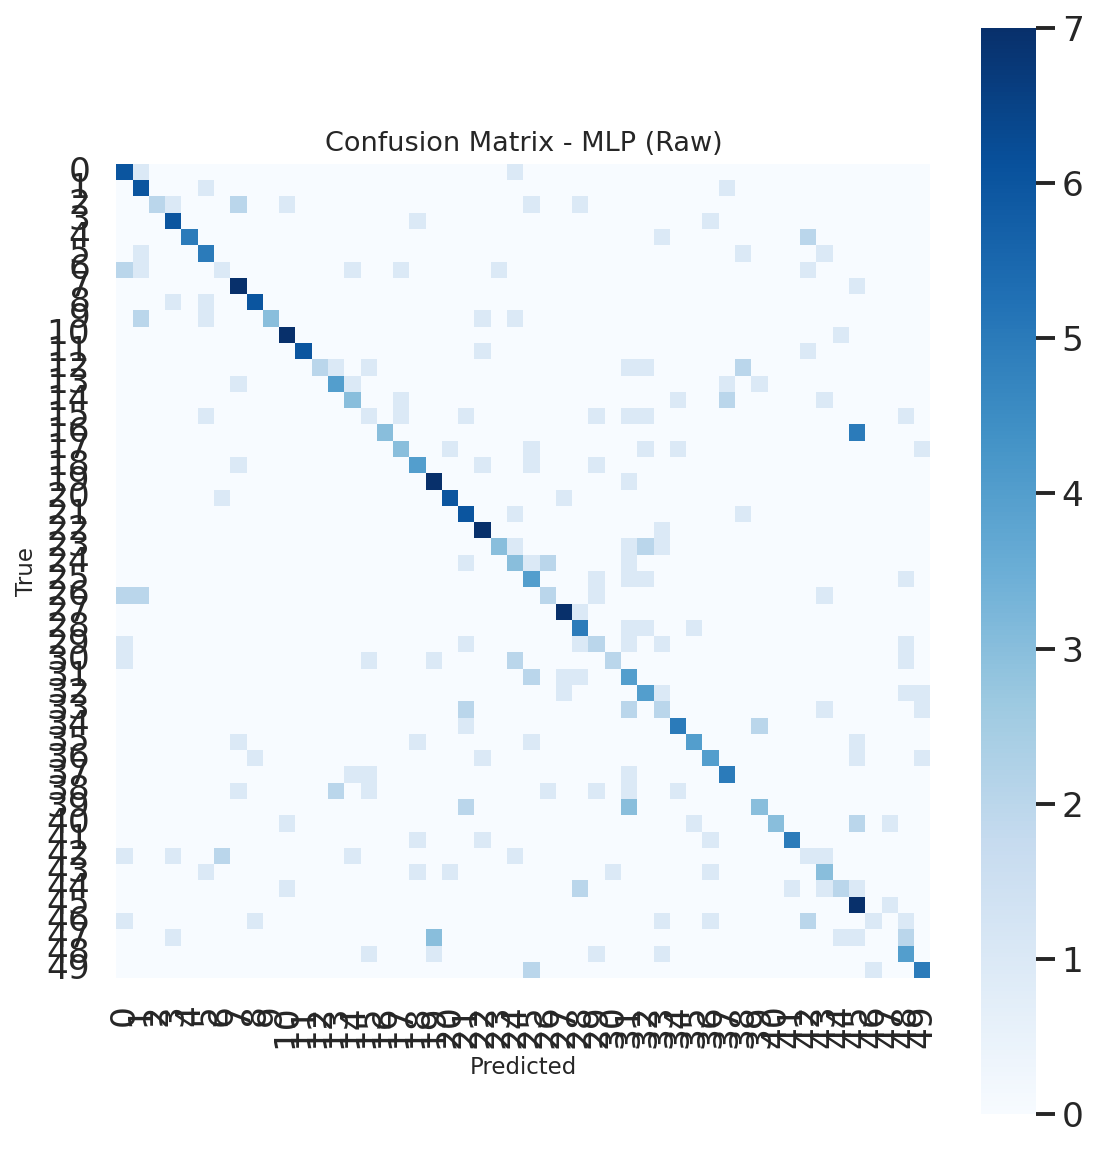


================ Decision Tree on Raw =================
Train accuracy: 1.0000
Test  accuracy: 0.3100
Precision (macro): 0.3260
Recall    (macro): 0.3100
F1-score  (macro): 0.3072

Classification report (test set):
              precision    recall  f1-score   support

           0      0.375     0.375     0.375         8
           1      0.273     0.375     0.316         8
           2      0.167     0.125     0.143         8
           3      0.800     0.500     0.615         8
           4      0.273     0.375     0.316         8
           5      0.000     0.000     0.000         8
           6      0.267     0.500     0.348         8
           7      0.500     0.375     0.429         8
           8      0.300     0.375     0.333         8
           9      0.182     0.250     0.211         8
          10      0.400     0.500     0.444         8
          11      0.385     0.625     0.476         8
          12      0.750     0.375     0.500         8
          13      0.300    

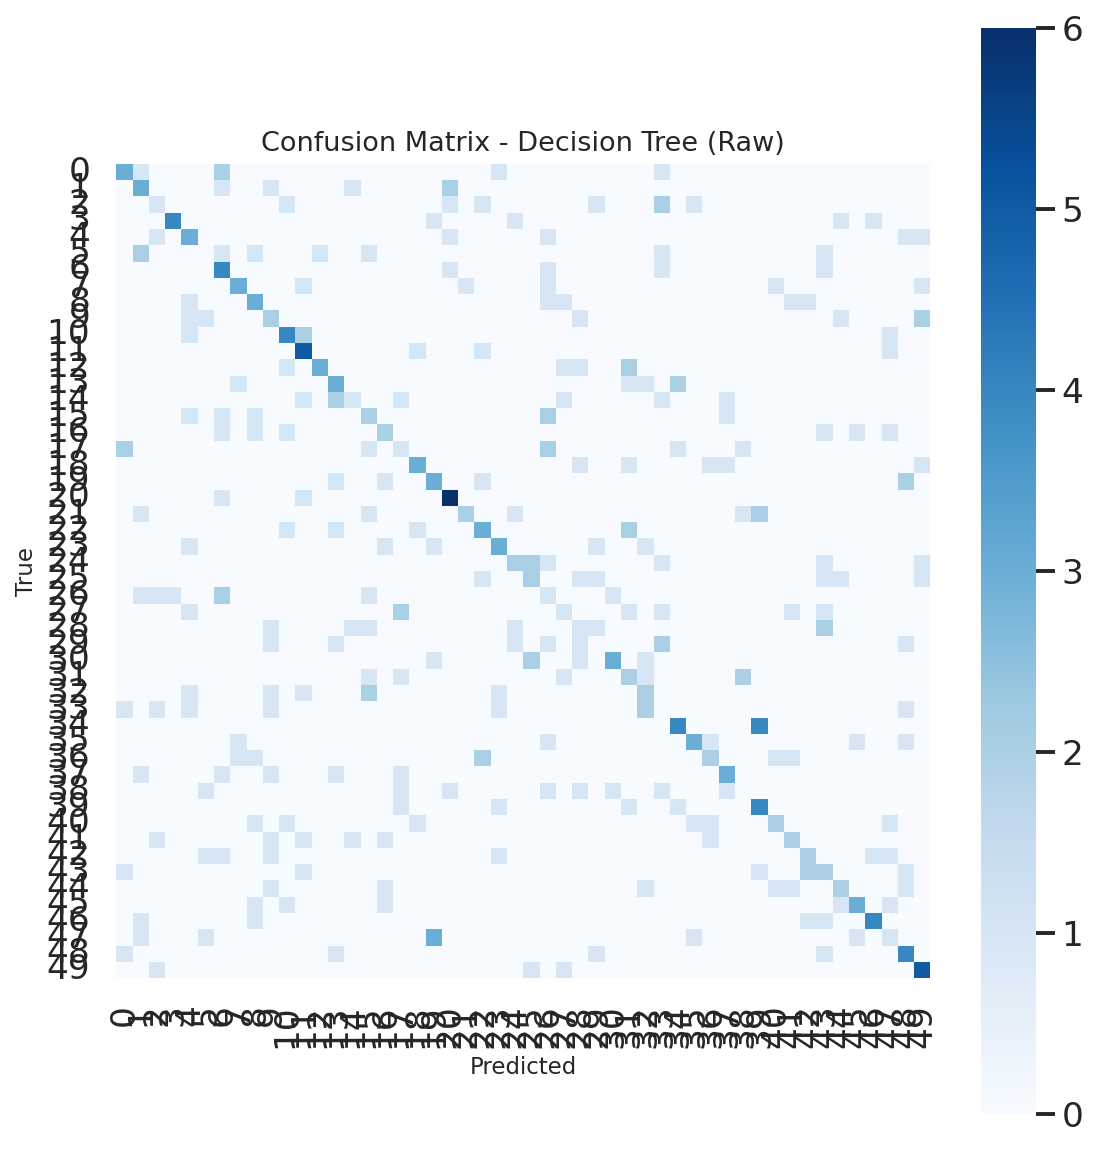


================ SVM Linear on Normalized =================
Train accuracy: 0.9856
Test  accuracy: 0.5525
Precision (macro): 0.5580
Recall    (macro): 0.5525
F1-score  (macro): 0.5398

Classification report (test set):
              precision    recall  f1-score   support

           0      0.583     0.875     0.700         8
           1      0.750     0.750     0.750         8
           2      0.333     0.250     0.286         8
           3      0.667     0.750     0.706         8
           4      0.778     0.875     0.824         8
           5      0.444     0.500     0.471         8
           6      0.364     0.500     0.421         8
           7      0.778     0.875     0.824         8
           8      0.700     0.875     0.778         8
           9      0.667     0.750     0.706         8
          10      0.714     0.625     0.667         8
          11      0.636     0.875     0.737         8
          12      0.750     0.750     0.750         8
          13      0.500

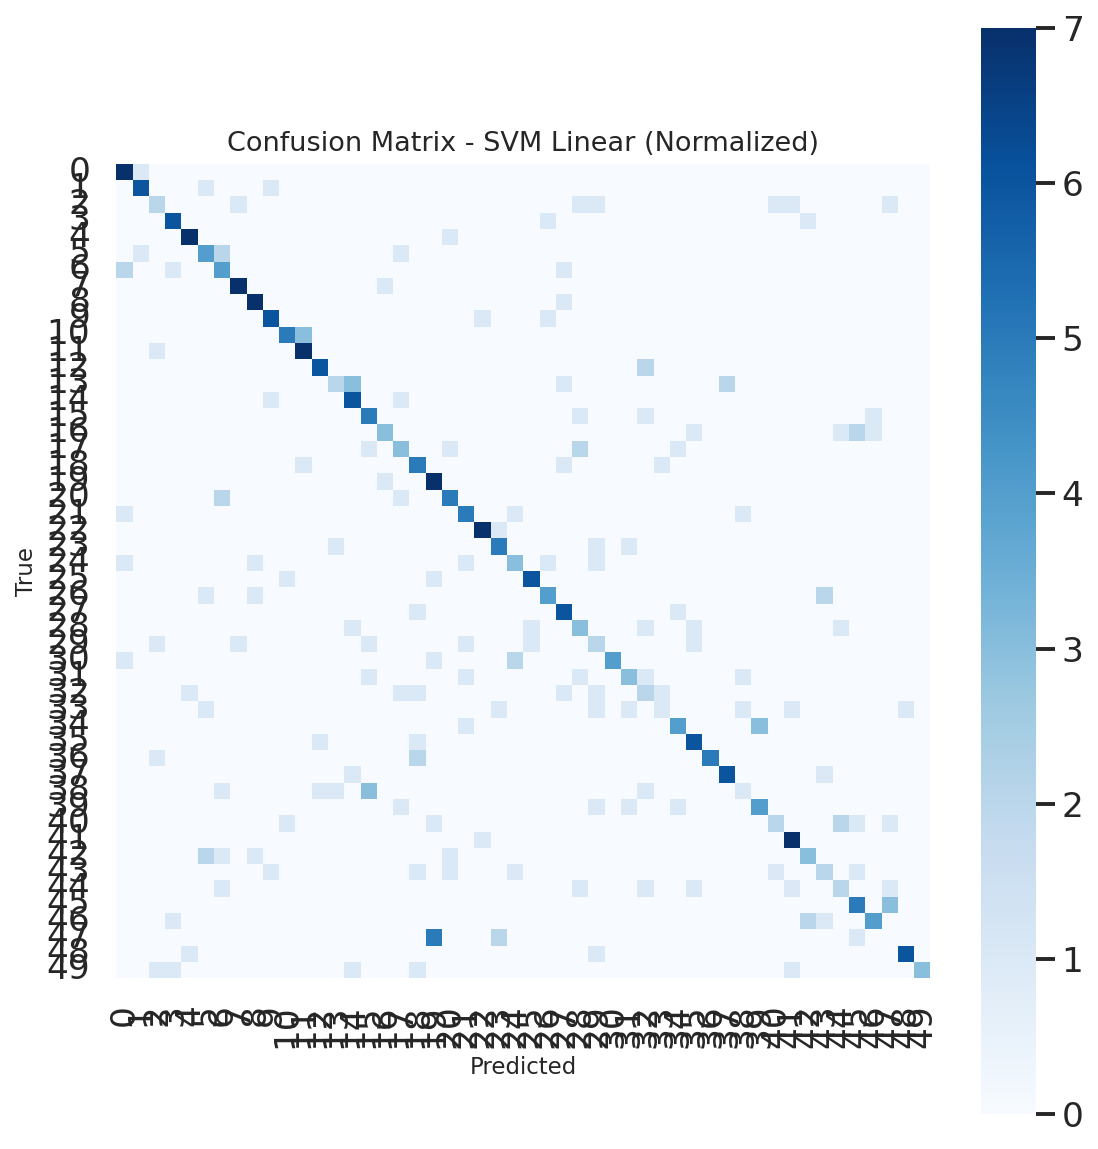


--- Learning Curve for SVM RBF on NORMALIZED dataset ---


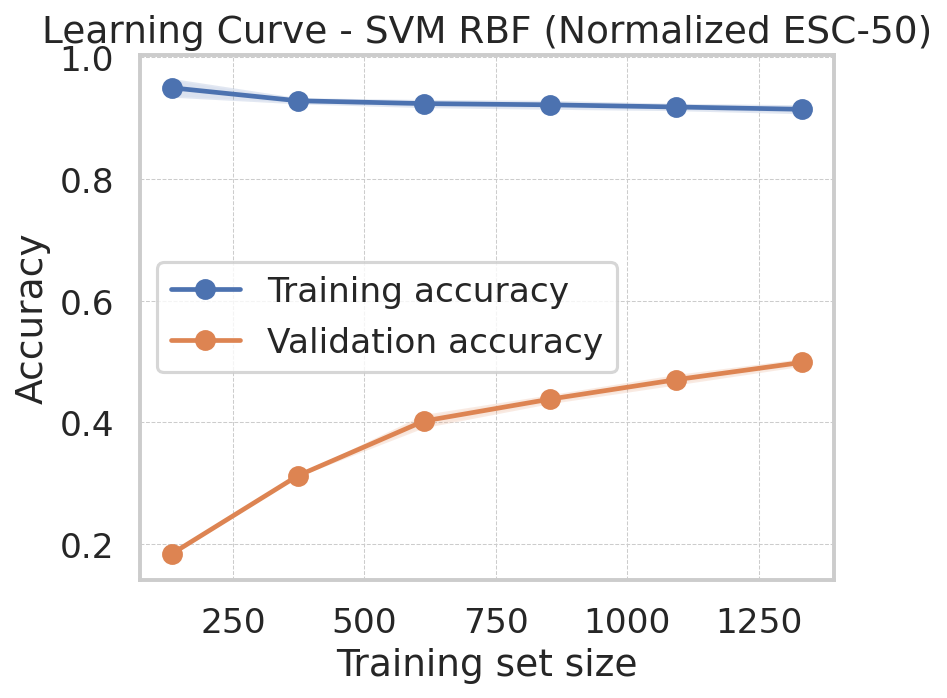


================ SVM RBF on Normalized =================
Train accuracy: 0.9050
Test  accuracy: 0.5200
Precision (macro): 0.5588
Recall    (macro): 0.5200
F1-score  (macro): 0.5171

Classification report (test set):
              precision    recall  f1-score   support

           0      0.545     0.750     0.632         8
           1      0.778     0.875     0.824         8
           2      0.250     0.250     0.250         8
           3      0.667     0.500     0.571         8
           4      1.000     0.750     0.857         8
           5      0.500     0.500     0.500         8
           6      0.364     0.500     0.421         8
           7      0.833     0.625     0.714         8
           8      0.545     0.750     0.632         8
           9      0.833     0.625     0.714         8
          10      0.889     1.000     0.941         8
          11      0.857     0.750     0.800         8
          12      0.714     0.625     0.667         8
          13      1.000   

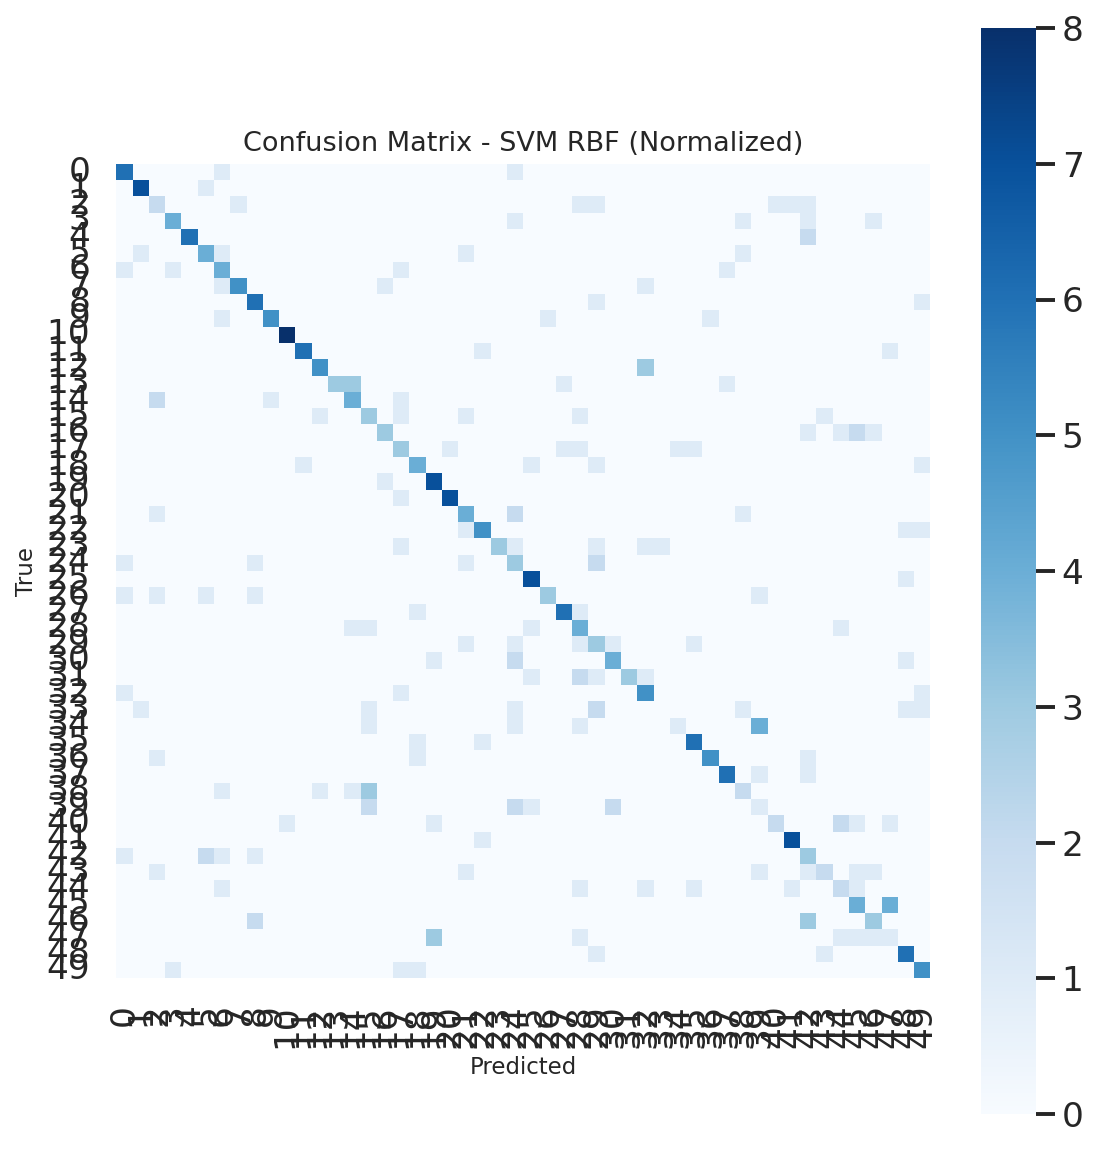

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.




================ MLP on Normalized =================
Train accuracy: 0.9988
Test  accuracy: 0.5500
Precision (macro): 0.5792
Recall    (macro): 0.5500
F1-score  (macro): 0.5477

Classification report (test set):
              precision    recall  f1-score   support

           0      0.545     0.750     0.632         8
           1      0.556     0.625     0.588         8
           2      0.400     0.250     0.308         8
           3      1.000     0.875     0.933         8
           4      0.778     0.875     0.824         8
           5      0.500     0.625     0.556         8
           6      0.571     0.500     0.533         8
           7      0.636     0.875     0.737         8
           8      0.600     0.750     0.667         8
           9      0.750     0.750     0.750         8
          10      0.600     0.750     0.667         8
          11      1.000     0.875     0.933         8
          12      0.750     0.750     0.750         8
          13      0.600     0.

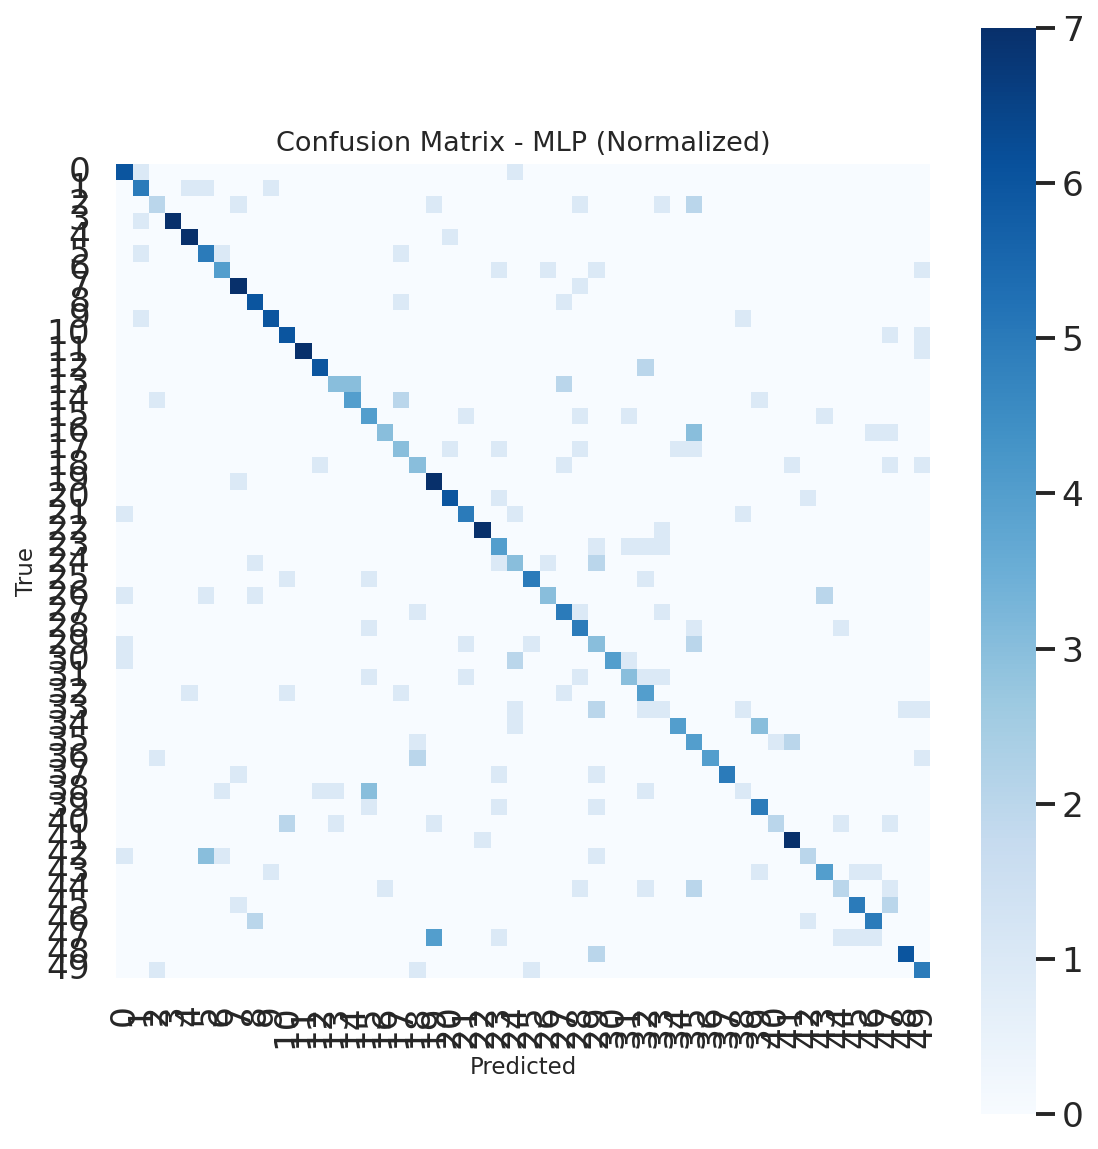


================ Decision Tree on Normalized =================
Train accuracy: 1.0000
Test  accuracy: 0.2950
Precision (macro): 0.3178
Recall    (macro): 0.2950
F1-score  (macro): 0.2946

Classification report (test set):
              precision    recall  f1-score   support

           0      0.143     0.125     0.133         8
           1      0.833     0.625     0.714         8
           2      0.167     0.125     0.143         8
           3      0.600     0.375     0.462         8
           4      0.273     0.375     0.316         8
           5      0.158     0.375     0.222         8
           6      0.214     0.375     0.273         8
           7      0.500     0.375     0.429         8
           8      0.300     0.375     0.333         8
           9      0.286     0.250     0.267         8
          10      0.400     0.500     0.444         8
          11      0.385     0.625     0.476         8
          12      1.000     0.375     0.545         8
          13      0.

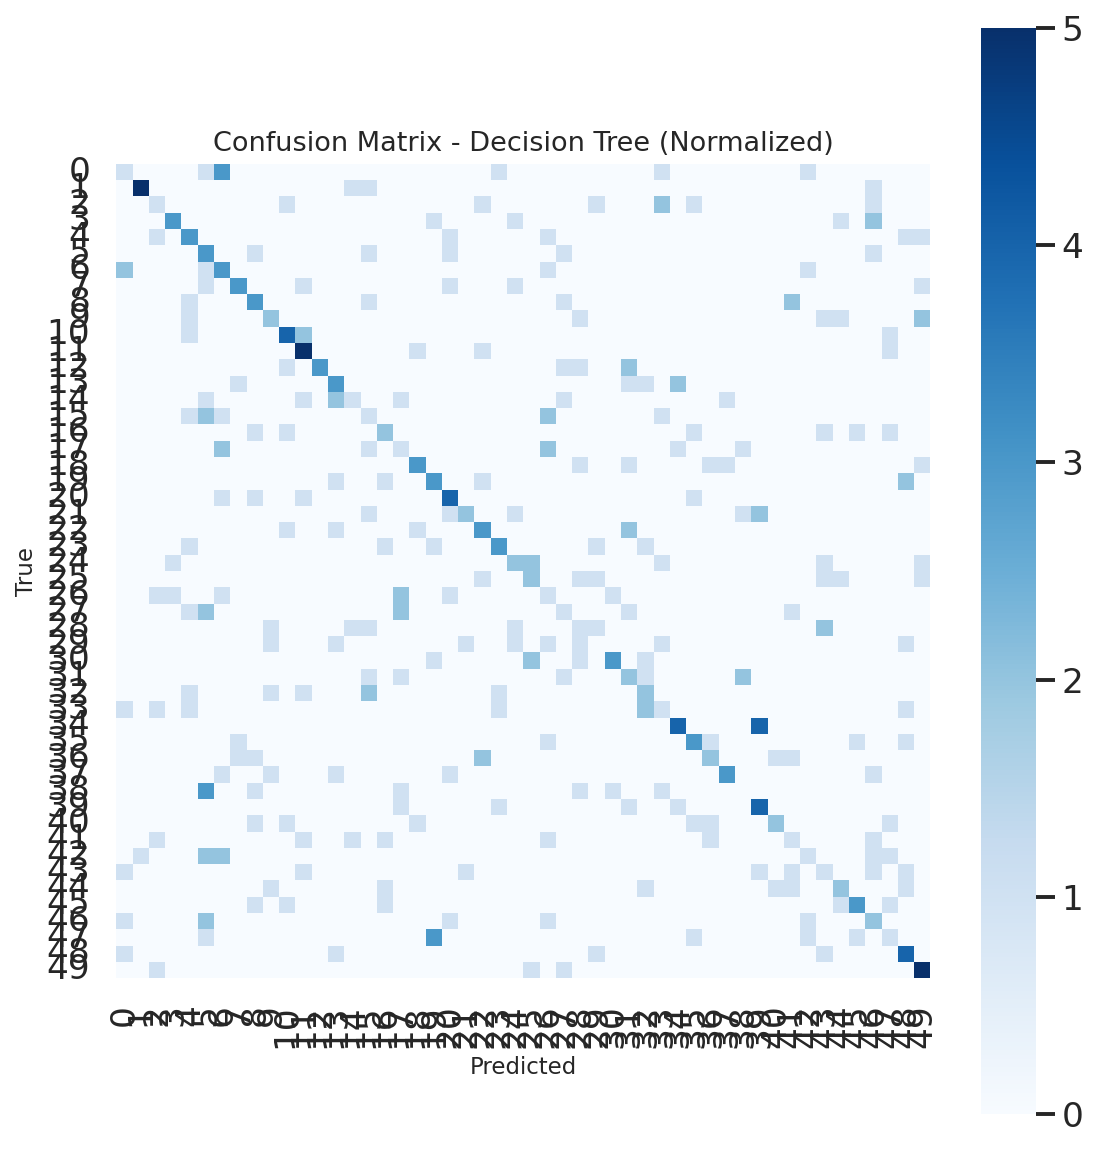


================ SVM Linear on Selected =================
Train accuracy: 0.9587
Test  accuracy: 0.4550
Precision (macro): 0.4967
Recall    (macro): 0.4550
F1-score  (macro): 0.4500

Classification report (test set):
              precision    recall  f1-score   support

           0      0.462     0.750     0.571         8
           1      0.545     0.750     0.632         8
           2      0.800     0.500     0.615         8
           3      0.667     0.500     0.571         8
           4      0.556     0.625     0.588         8
           5      0.400     0.250     0.308         8
           6      0.500     0.500     0.500         8
           7      0.500     0.375     0.429         8
           8      0.308     0.500     0.381         8
           9      0.500     0.625     0.556         8
          10      0.778     0.875     0.824         8
          11      0.778     0.875     0.824         8
          12      0.750     0.375     0.500         8
          13      0.800  

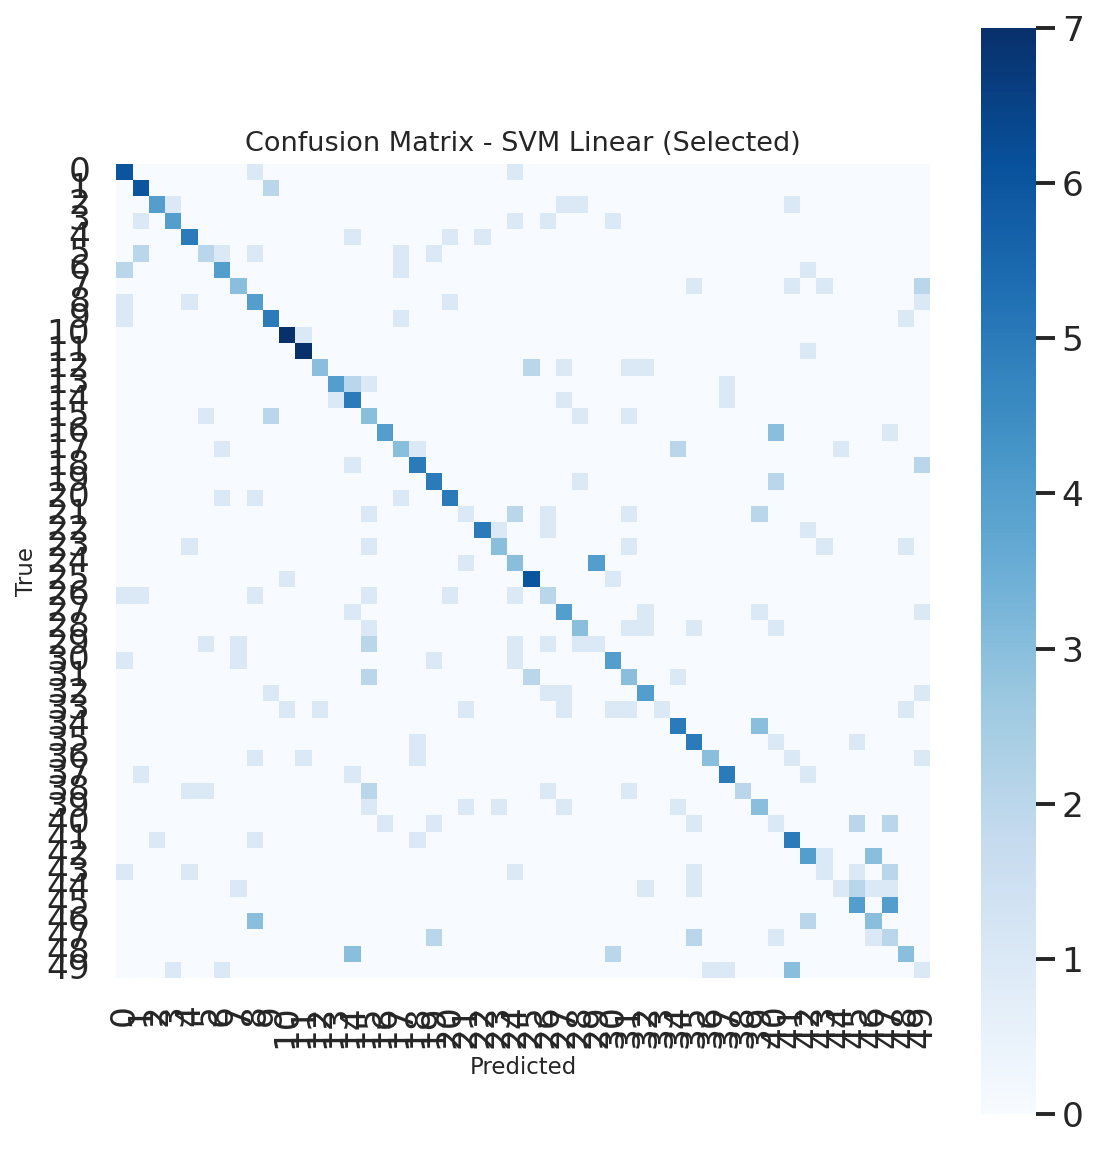


================ SVM RBF on Selected =================
Train accuracy: 0.4612
Test  accuracy: 0.3325
Precision (macro): 0.3757
Recall    (macro): 0.3325
F1-score  (macro): 0.3218

Classification report (test set):
              precision    recall  f1-score   support

           0      0.417     0.625     0.500         8
           1      0.500     0.375     0.429         8
           2      0.667     0.500     0.571         8
           3      0.500     0.125     0.200         8
           4      1.000     0.375     0.545         8
           5      0.250     0.125     0.167         8
           6      0.667     0.500     0.571         8
           7      0.125     0.125     0.125         8
           8      0.133     0.250     0.174         8
           9      0.714     0.625     0.667         8
          10      0.700     0.875     0.778         8
          11      0.417     0.625     0.500         8
          12      0.714     0.625     0.667         8
          13      1.000     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



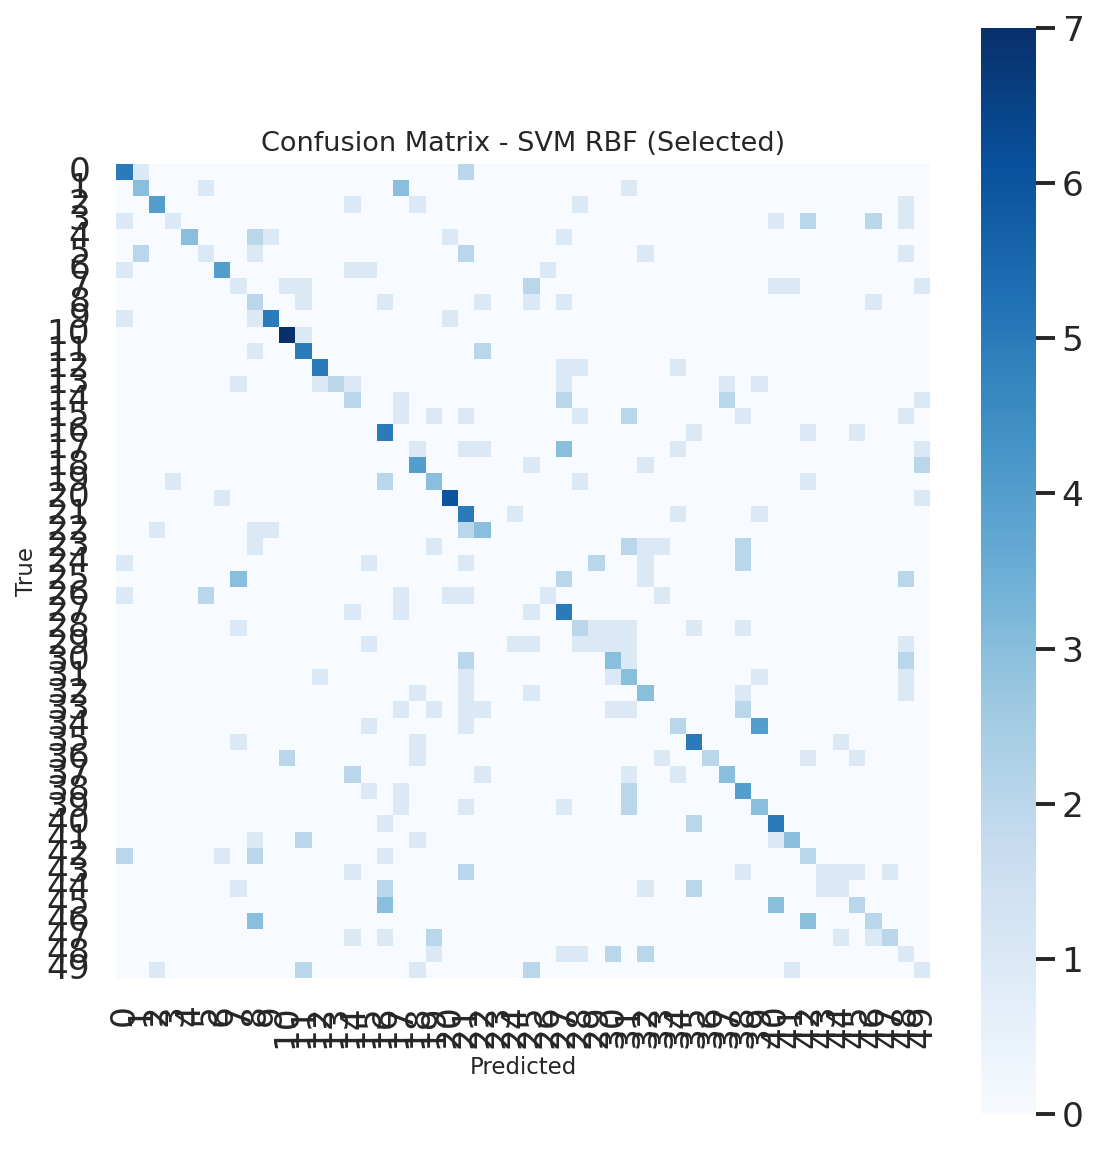


================ MLP on Selected =================
Train accuracy: 0.6825
Test  accuracy: 0.4025
Precision (macro): 0.4521
Recall    (macro): 0.4025
F1-score  (macro): 0.3960

Classification report (test set):
              precision    recall  f1-score   support

           0      0.333     0.125     0.182         8
           1      0.600     0.375     0.462         8
           2      0.800     0.500     0.615         8
           3      0.556     0.625     0.588         8
           4      0.857     0.750     0.800         8
           5      0.158     0.375     0.222         8
           6      0.333     0.125     0.182         8
           7      0.400     0.250     0.308         8
           8      0.462     0.750     0.571         8
           9      0.750     0.750     0.750         8
          10      1.000     1.000     1.000         8
          11      0.833     0.625     0.714         8
          12      1.000     0.125     0.222         8
          13      0.222     0.75

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



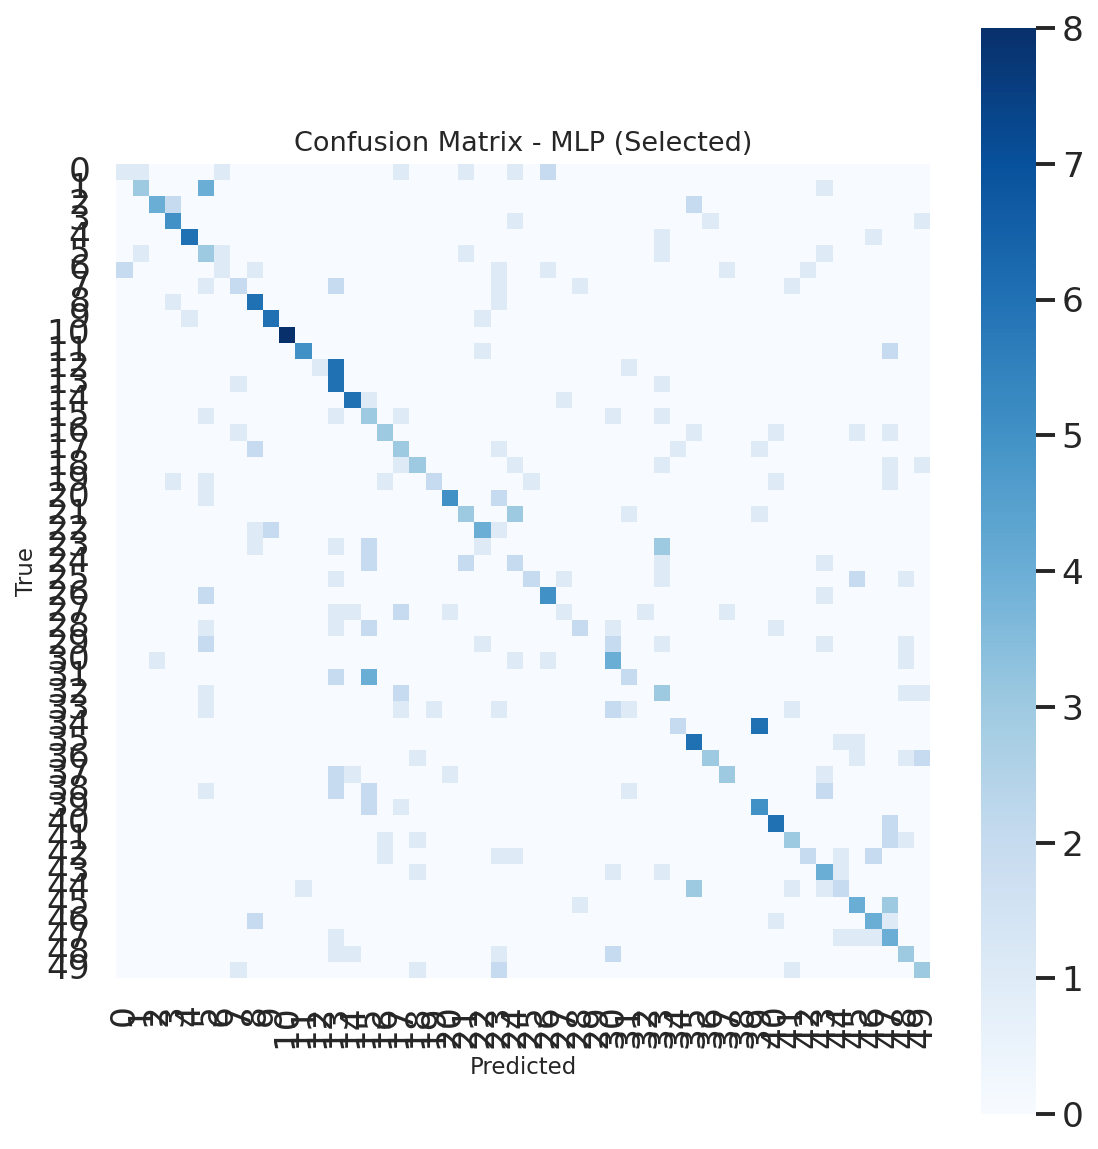


================ Decision Tree on Selected =================
Train accuracy: 1.0000
Test  accuracy: 0.2825
Precision (macro): 0.3249
Recall    (macro): 0.2825
F1-score  (macro): 0.2910

Classification report (test set):
              precision    recall  f1-score   support

           0      0.400     0.250     0.308         8
           1      0.857     0.750     0.800         8
           2      0.286     0.250     0.267         8
           3      0.500     0.250     0.333         8
           4      0.300     0.375     0.333         8
           5      0.333     0.125     0.182         8
           6      0.250     0.375     0.300         8
           7      0.200     0.125     0.154         8
           8      0.182     0.250     0.211         8
           9      0.333     0.375     0.353         8
          10      0.375     0.375     0.375         8
          11      0.500     0.500     0.500         8
          12      0.750     0.375     0.500         8
          13      0.50

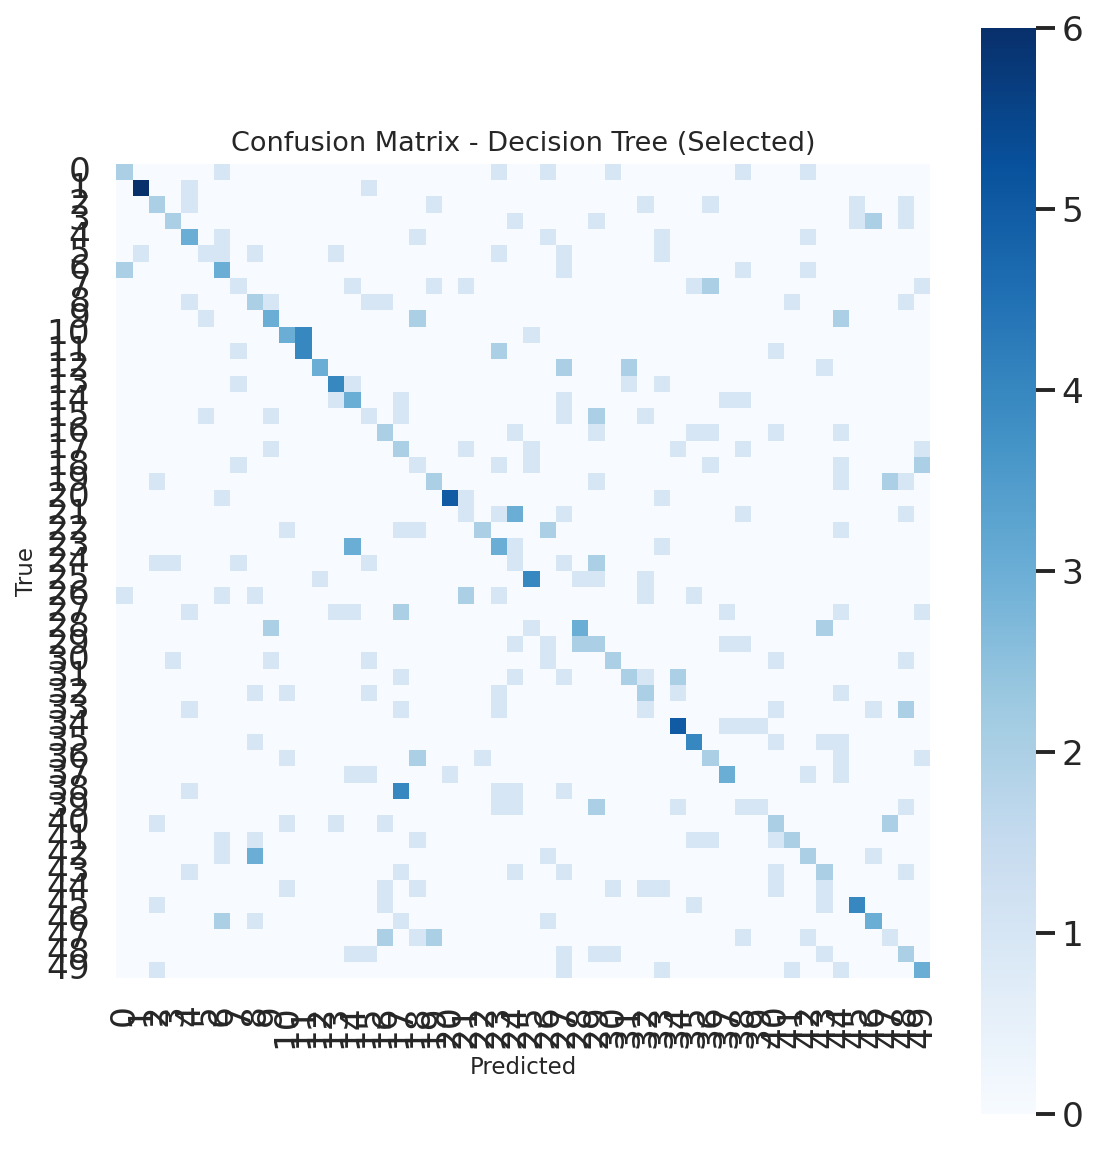

,Dataset,Model,Train_accuracy,Test_accuracy,Precision_macro,Recall_macro,F1_macro
0,Raw,SVM Linear,1.000000,0.5050,0.530448,0.5050,0.495152
1,Raw,SVM RBF,0.539375,0.3925,0.439189,0.3925,0.384580
2,Raw,MLP,0.865000,0.4900,0.535596,0.4900,0.476188
3,Raw,Decision Tree,1.000000,0.3100,0.326017,0.3100,0.307215
4,Normalized,SVM Linear,0.985625,0.5525,0.557957,0.5525,0.539759
5,Normalized,SVM RBF,0.905000,0.5200,0.558833,0.5200,0.517119
6,Normalized,MLP,0.998750,0.5500,0.579161,0.5500,0.547660
7,Normalized,Decision Tree,1.000000,0.2950,0.317781,0.2950,0.294593
8,Selected,SVM Linear,0.958750,0.4550,0.496736,0.4550,0.449983
9,Selected,SVM RBF,0.461250,0.3325,0.375720,0.3325,0.321850


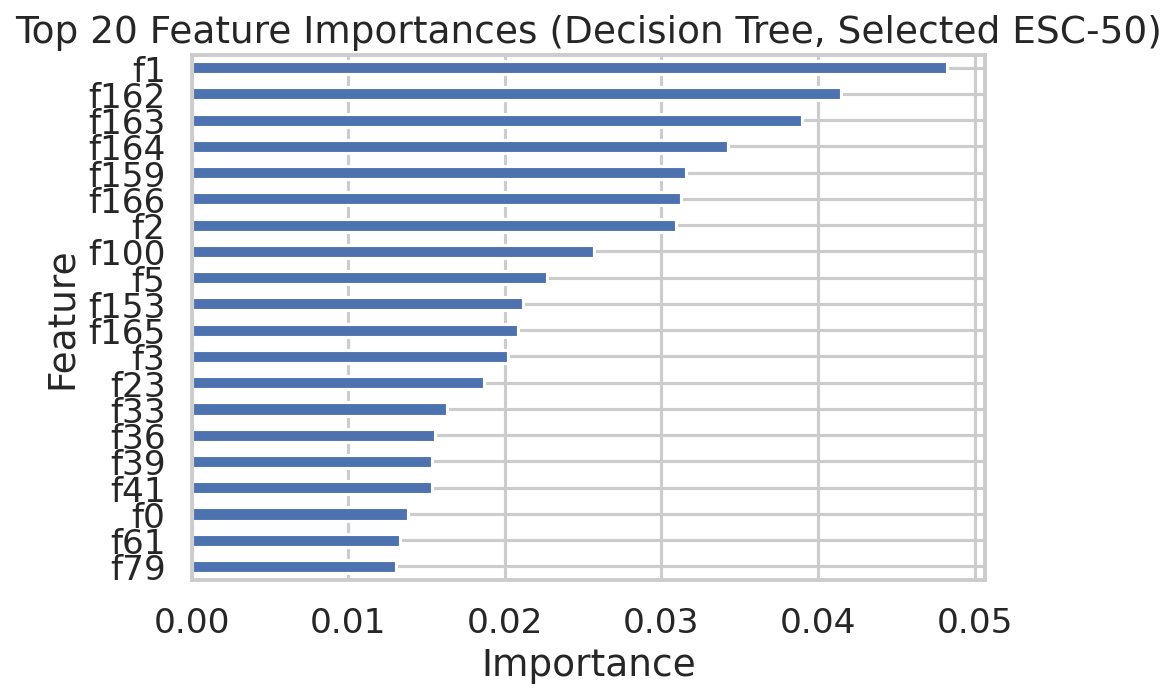

In [ ]:

# ECEN 758 – ESC-50 Model Eval
# SVM (linear/RBF), MLP, Decision Tree
# On Raw / Normalized / Selected feature sets


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
)

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


# 1. load ESC-50 feature CSVs safely

def load_esc50_features(path, name=""):
    """
    Loads a feature CSV of the form:
        filename, target, label, f0, f1, ..., fN

    Returns:
        df          : full DataFrame
        X           : feature matrix (float32)
        y           : integer targets (0..49)
        labels      : category labels (optional, may be None)
        feature_cols: list of feature column names
    """
    df = pd.read_csv(path)
    print(f"Loaded {name} from {path}  ->  shape = {df.shape}")

    # Columns that are definitely NOT features
    non_feature_cols = [c for c in ["filename", "target", "label"] if c in df.columns]

    # Primary rule: features are columns that start with "f"
    feature_cols = [c for c in df.columns if c.startswith("f")]

    # Fallback: if for some reason features do not start with "f",
    # use all numeric columns except the non-feature cols.
    if len(feature_cols) == 0:
        feature_cols = (
            df.drop(columns=non_feature_cols, errors="ignore")
            .select_dtypes(include=[np.number])
            .columns.tolist()
        )

    # Make sure we never accidentally include filename strings

    feature_cols = [c for c in feature_cols if c not in non_feature_cols]

    X = df[feature_cols].values.astype(np.float32)

    if "target" in df.columns:
        y = df["target"].values.astype(int)
    else:
        raise ValueError("No 'target' column found in dataset")

    labels = df["label"].values if "label" in df.columns else None

    print(
        f"{name}: X.shape = {X.shape}, y.shape = {y.shape}, "
        f"num_features = {len(feature_cols)}"
    )
    return df, X, y, labels, feature_cols


# 2. Formatted confusion matrix

def plot_confusion_matrix_cm(y_true, y_pred, title="", figsize=(8, 8)):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]

    plt.figure(figsize=figsize, dpi=150)
    sns.heatmap(
        cm,
        annot=False,
        cmap="Blues",
        square=True,
        cbar=True,
        xticklabels=np.arange(num_classes),
        yticklabels=np.arange(num_classes),
    )
    plt.xlabel("Predicted", fontsize=11)
    plt.ylabel("True", fontsize=11)
    plt.title(title, fontsize=13)
    plt.tight_layout()
    plt.show()


# 3. learning curve (we'll use for SVM RBF on Normalized)

def plot_learning_curve_model(model, X, y, title="Learning Curve", cv_splits=3):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        train_sizes=np.linspace(0.1, 1.0, 6),
        scoring="accuracy",
        n_jobs=-1,
        shuffle=True,
        random_state=42,
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure(figsize=(6, 5), dpi=150)
    plt.plot(train_sizes, train_mean, marker="o", label="Training accuracy")
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2
    )

    plt.plot(train_sizes, val_mean, marker="o", label="Validation accuracy")
    plt.fill_between(
        train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2
    )

    plt.xlabel("Training set size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


# 4. Evaluate a model (train+test) and plot confusion matrix

def evaluate_model(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
    model_name="Model",
    dataset_name="Dataset",
    plot_cm=True,
):
    model.fit(X_train, y_train)

    # Train and test predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train/Test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Macro Precision/Recall/F1 (on test set)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_test_pred, average="macro", zero_division=0
    )

    # Print a short report
    print(
        f"\n================ {model_name} on {dataset_name} ================="
    )
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test  accuracy: {test_acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall    (macro): {rec:.4f}")
    print(f"F1-score  (macro): {f1:.4f}")
    print("\nClassification report (test set):")
    print(classification_report(y_test, y_test_pred, digits=3))

    if plot_cm:
        title = f"Confusion Matrix - {model_name} ({dataset_name})"
        plot_confusion_matrix_cm(y_test, y_test_pred, title=title)

    # Return metrics for table
    return {
        "Dataset": dataset_name,
        "Model": model_name,
        "Train_accuracy": train_acc,
        "Test_accuracy": test_acc,
        "Precision_macro": prec,
        "Recall_macro": rec,
        "F1_macro": f1,
    }


# 5. Load the three datasets

raw_df, X_raw, y_raw, labels_raw, feat_raw = load_esc50_features(
    "data_out/esc50_features_raw.csv", name="RAW"
)

norm_df, X_norm, y_norm, labels_norm, feat_norm = load_esc50_features(
    "data_out/esc50_features_normalized_corrected.csv", name="NORMALIZED"
)

sel_df, X_sel, y_sel, labels_sel, feat_sel = load_esc50_features(
    "data_out/esc50_features_selected.csv", name="SELECTED"
)



# 6. Define models to evaluate

models = {
    "SVM Linear": SVC(kernel="linear", C=1.0, random_state=42),
    "SVM RBF": SVC(kernel="rbf", C=10.0, gamma="scale", random_state=42),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(256,),
        activation="relu",
        solver="adam",
        batch_size=64,
        max_iter=100,
        random_state=42,
        verbose=False,
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=None, min_samples_split=2, random_state=42
    ),
}



# 7. Train/Test split (one split per dataset, shared by all models)

def split_dataset(X, y, test_size=0.2, seed=42):
    return train_test_split(
        X,
        y,
        test_size=test_size,
        stratify=y,
        random_state=seed,
    )


Xr_tr, Xr_te, yr_tr, yr_te = split_dataset(X_raw, y_raw)
Xn_tr, Xn_te, yn_tr, yn_te = split_dataset(X_norm, y_norm)
Xs_tr, Xs_te, ys_tr, ys_te = split_dataset(X_sel, y_sel)



# 8. Run all models on all datasets

results = []

datasets = [
    ("Raw", Xr_tr, Xr_te, yr_tr, yr_te),
    ("Normalized", Xn_tr, Xn_te, yn_tr, yn_te),
    ("Selected", Xs_tr, Xs_te, ys_tr, ys_te),
]

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    for model_name, model in models.items():
        # Plot learning curve only for SVM RBF on Normalized set
        if dataset_name == "Normalized" and model_name == "SVM RBF":
            print("\n--- Learning Curve for SVM RBF on NORMALIZED dataset ---")
            plot_learning_curve_model(
                model,
                np.vstack([X_train, X_test]),
                np.hstack([y_train, y_test]),
                title="Learning Curve - SVM RBF (Normalized ESC-50)",
                cv_splits=3,
            )

        # Evaluate model and record metrics
        res = evaluate_model(
            model,
            X_train,
            X_test,
            y_train,
            y_test,
            model_name=model_name,
            dataset_name=dataset_name,
            plot_cm=True,
        )
        results.append(res)

# Convert results to DataFrame for a table
results_df = pd.DataFrame(results)
display(results_df)


# 9. Feature importance plot for Decision Tree on SELECTED dataset
# Re-train Decision Tree on full SELECTED data (train+test) for importances

dtree = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, random_state=42
)
dtree.fit(X_sel, y_sel)

importances = dtree.feature_importances_
feat_importances = pd.Series(importances, index=feat_sel)

# Take top 20 most important features
top20 = feat_importances.sort_values(ascending=False).head(20)[::-1]  # reversed for nice barh

plt.figure(figsize=(7, 5), dpi=150)
top20.plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances (Decision Tree, Selected ESC-50)")
plt.tight_layout()
plt.show()


In [ ]:

# ECEN 758 – ESC-50 Model Eval
# Logistic Regression, KNN
# On Raw / Normalized / Selected feature sets


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# 1. load ESC-50 feature CSVs safely

def load_esc50_features(path, name=""):
    """
    Loads a feature CSV of the form:
        filename, target, label, f0, f1, ..., fN

    Returns:
        df          : full DataFrame
        X           : feature matrix (float32)
        y           : integer targets (0..49)
        labels      : category labels (optional, may be None)
        feature_cols: list of feature column names
    """
    df = pd.read_csv(path)
    print(f"Loaded {name} from {path}  ->  shape = {df.shape}")

    # Columns that are definitely NOT features
    non_feature_cols = [c for c in ["filename", "target", "label"] if c in df.columns]

    # Primary rule: features are columns that start with "f"
    feature_cols = [c for c in df.columns if c.startswith("f")]

    # Fallback: if for some reason features do not start with "f",
    # use all numeric columns except the non-feature cols.
    if len(feature_cols) == 0:
        feature_cols = (
            df.drop(columns=non_feature_cols, errors="ignore")
            .select_dtypes(include=[np.number])
            .columns.tolist()
        )

    # Make sure we never accidentally include filename strings

    feature_cols = [c for c in feature_cols if c not in non_feature_cols]

    X = df[feature_cols].values.astype(np.float32)

    if "target" in df.columns:
        y = df["target"].values.astype(int)
    else:
        raise ValueError("No 'target' column found in dataset")

    labels = df["label"].values if "label" in df.columns else None

    print(
        f"{name}: X.shape = {X.shape}, y.shape = {y.shape}, "
        f"num_features = {len(feature_cols)}"
    )
    return df, X, y, labels, feature_cols





In [ ]:
# 2. Formatted confusion matrix

def plot_confusion_matrix_cm(y_true, y_pred, title="", figsize=(8, 8)):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]

    plt.figure(figsize=figsize, dpi=150)
    sns.heatmap(
        cm,
        annot=False,
        cmap="Blues",
        square=True,
        cbar=True,
        xticklabels=np.arange(num_classes),
        yticklabels=np.arange(num_classes),
    )
    plt.xlabel("Predicted", fontsize=11)
    plt.ylabel("True", fontsize=11)
    plt.title(title, fontsize=13)
    plt.tight_layout()
    plt.show()


# 3. Evaluate a model (train+test) and plot confusion matrix

def evaluate_model(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
    model_name="Model",
    dataset_name="Dataset",
    plot_cm=True,
):
    model.fit(X_train, y_train)

    # Train and test predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train/Test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Macro Precision/Recall/F1 (on test set)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_test_pred, average="macro", zero_division=0
    )

    # Print a short report
    print(
        f"\n================ {model_name} on {dataset_name} ================="
    )
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test  accuracy: {test_acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall    (macro): {rec:.4f}")
    print(f"F1-score  (macro): {f1:.4f}")
    print("\nClassification report (test set):")
    print(classification_report(y_test, y_test_pred, digits=3))

    if plot_cm:
        title = f"Confusion Matrix - {model_name} ({dataset_name})"
        plot_confusion_matrix_cm(y_test, y_test_pred, title=title)

    # Return metrics for table
    return {
        "Dataset": dataset_name,
        "Model": model_name,
        "Train_accuracy": train_acc,
        "Test_accuracy": test_acc,
        "Precision_macro": prec,
        "Recall_macro": rec,
        "F1_macro": f1,
    }

# 4. Load the three datasets

raw_df, X_raw, y_raw, labels_raw, feat_raw = load_esc50_features(
    "data_out/esc50_features_raw.csv", name="RAW"
)

norm_df, X_norm, y_norm, labels_norm, feat_norm = load_esc50_features(
    "data_out/esc50_features_normalized_corrected.csv", name="NORMALIZED"
)

sel_df, X_sel, y_sel, labels_sel, feat_sel = load_esc50_features(
    "data_out/esc50_features_selected.csv", name="SELECTED"
)


Loaded RAW from data_out/esc50_features_raw.csv  ->  shape = (2000, 176)
RAW: X.shape = (2000, 173), y.shape = (2000,), num_features = 173
Loaded NORMALIZED from data_out/esc50_features_normalized_corrected.csv  ->  shape = (2000, 175)
NORMALIZED: X.shape = (2000, 173), y.shape = (2000,), num_features = 173
Loaded SELECTED from data_out/esc50_features_selected.csv  ->  shape = (2000, 103)
SELECTED: X.shape = (2000, 100), y.shape = (2000,), num_features = 100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




================ Logistic Regression on Raw =================
Train accuracy: 0.9306
Test  accuracy: 0.4350
Precision (macro): 0.4670
Recall    (macro): 0.4350
F1-score  (macro): 0.4306

Classification report (test set):
              precision    recall  f1-score   support

           0      0.308     0.500     0.381         8
           1      0.400     0.500     0.444         8
           2      0.600     0.375     0.462         8
           3      0.667     0.500     0.571         8
           4      0.375     0.750     0.500         8
           5      0.600     0.375     0.462         8
           6      0.333     0.500     0.400         8
           7      0.400     0.500     0.444         8
           8      0.500     0.125     0.200         8
           9      0.800     0.500     0.615         8
          10      0.778     0.875     0.824         8
          11      0.875     0.875     0.875         8
          12      0.429     0.375     0.400         8
          13      0.5

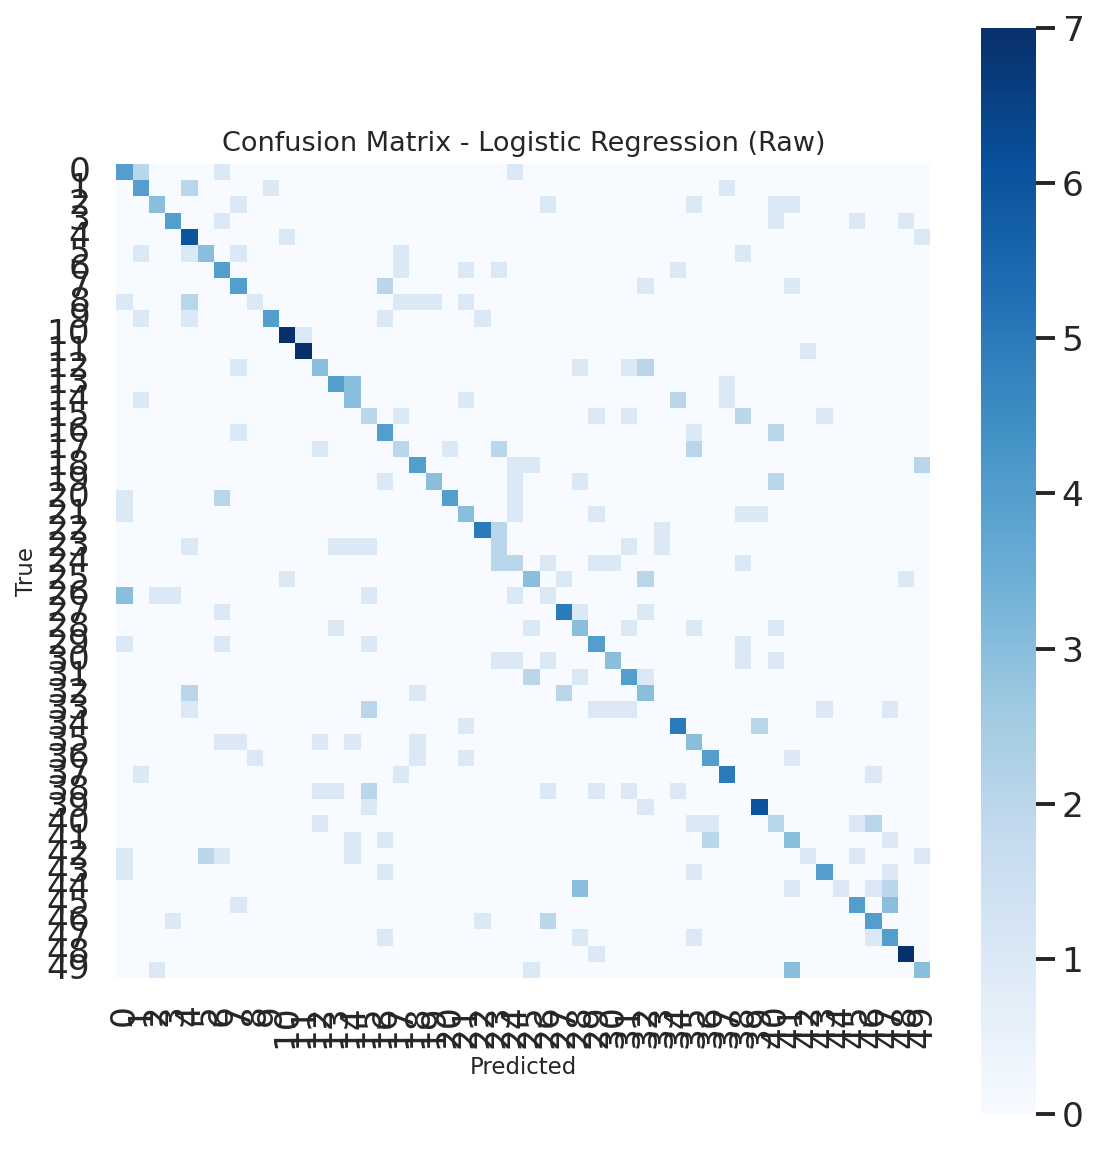


================ KNN on Raw =================
Train accuracy: 1.0000
Test  accuracy: 0.3950
Precision (macro): 0.4611
Recall    (macro): 0.3950
F1-score  (macro): 0.4031

Classification report (test set):
              precision    recall  f1-score   support

           0      0.600     0.375     0.462         8
           1      0.667     0.500     0.571         8
           2      0.667     0.250     0.364         8
           3      0.429     0.375     0.400         8
           4      0.667     0.500     0.571         8
           5      0.625     0.625     0.625         8
           6      0.375     0.375     0.375         8
           7      0.667     0.500     0.571         8
           8      0.333     0.375     0.353         8
           9      0.833     0.625     0.714         8
          10      0.444     0.500     0.471         8
          11      0.357     0.625     0.455         8
          12      0.500     0.375     0.429         8
          13      1.000     0.250    

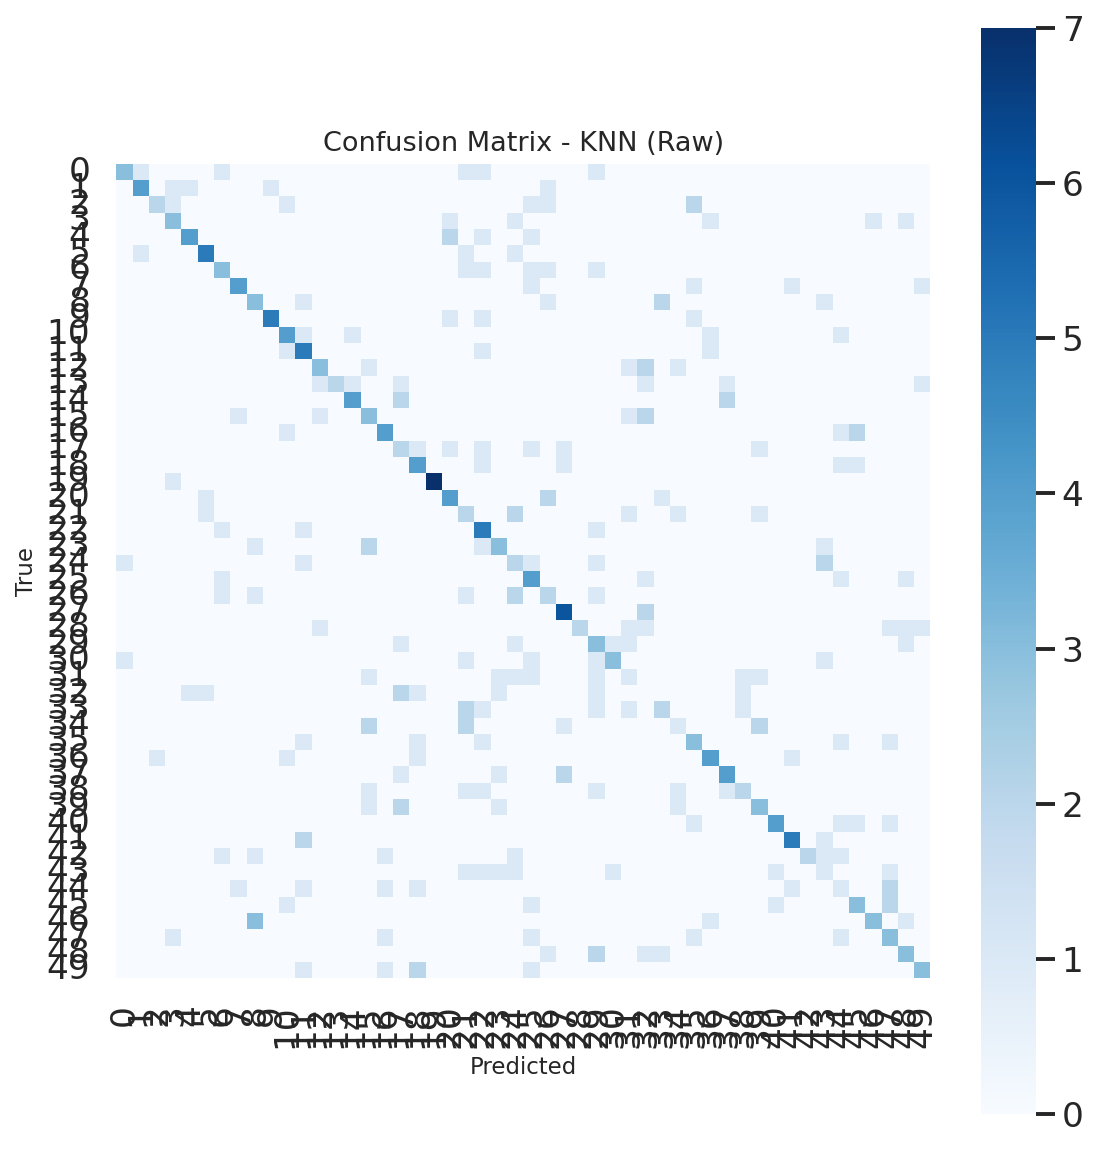


================ Logistic Regression on Normalized =================
Train accuracy: 0.8844
Test  accuracy: 0.5075
Precision (macro): 0.5327
Recall    (macro): 0.5075
F1-score  (macro): 0.4984

Classification report (test set):
              precision    recall  f1-score   support

           0      0.429     0.750     0.545         8
           1      0.556     0.625     0.588         8
           2      0.500     0.375     0.429         8
           3      0.636     0.875     0.737         8
           4      0.545     0.750     0.632         8
           5      0.571     0.500     0.533         8
           6      0.429     0.375     0.400         8
           7      0.778     0.875     0.824         8
           8      0.750     0.750     0.750         8
           9      0.857     0.750     0.800         8
          10      0.750     0.750     0.750         8
          11      0.875     0.875     0.875         8
          12      0.667     0.750     0.706         8
          13  

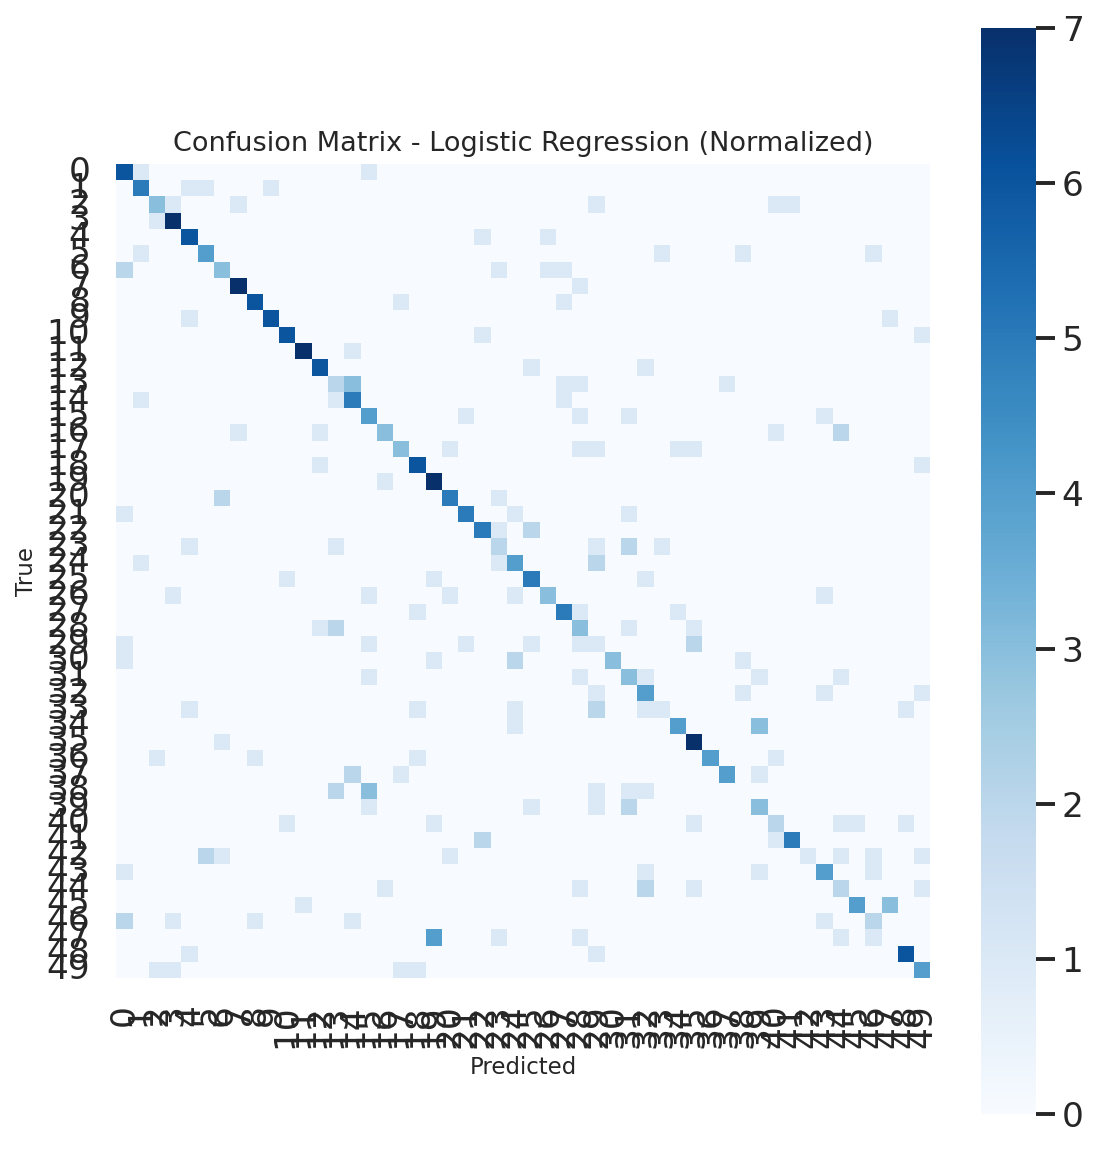


================ KNN on Normalized =================
Train accuracy: 1.0000
Test  accuracy: 0.4750
Precision (macro): 0.4997
Recall    (macro): 0.4750
F1-score  (macro): 0.4664

Classification report (test set):
              precision    recall  f1-score   support

           0      0.429     0.375     0.400         8
           1      0.714     0.625     0.667         8
           2      0.500     0.500     0.500         8
           3      0.714     0.625     0.667         8
           4      0.857     0.750     0.800         8
           5      0.750     0.375     0.500         8
           6      0.385     0.625     0.476         8
           7      0.750     0.750     0.750         8
           8      0.500     0.875     0.636         8
           9      0.500     0.375     0.429         8
          10      0.500     0.625     0.556         8
          11      0.600     0.750     0.667         8
          12      0.750     0.750     0.750         8
          13      0.500     0.

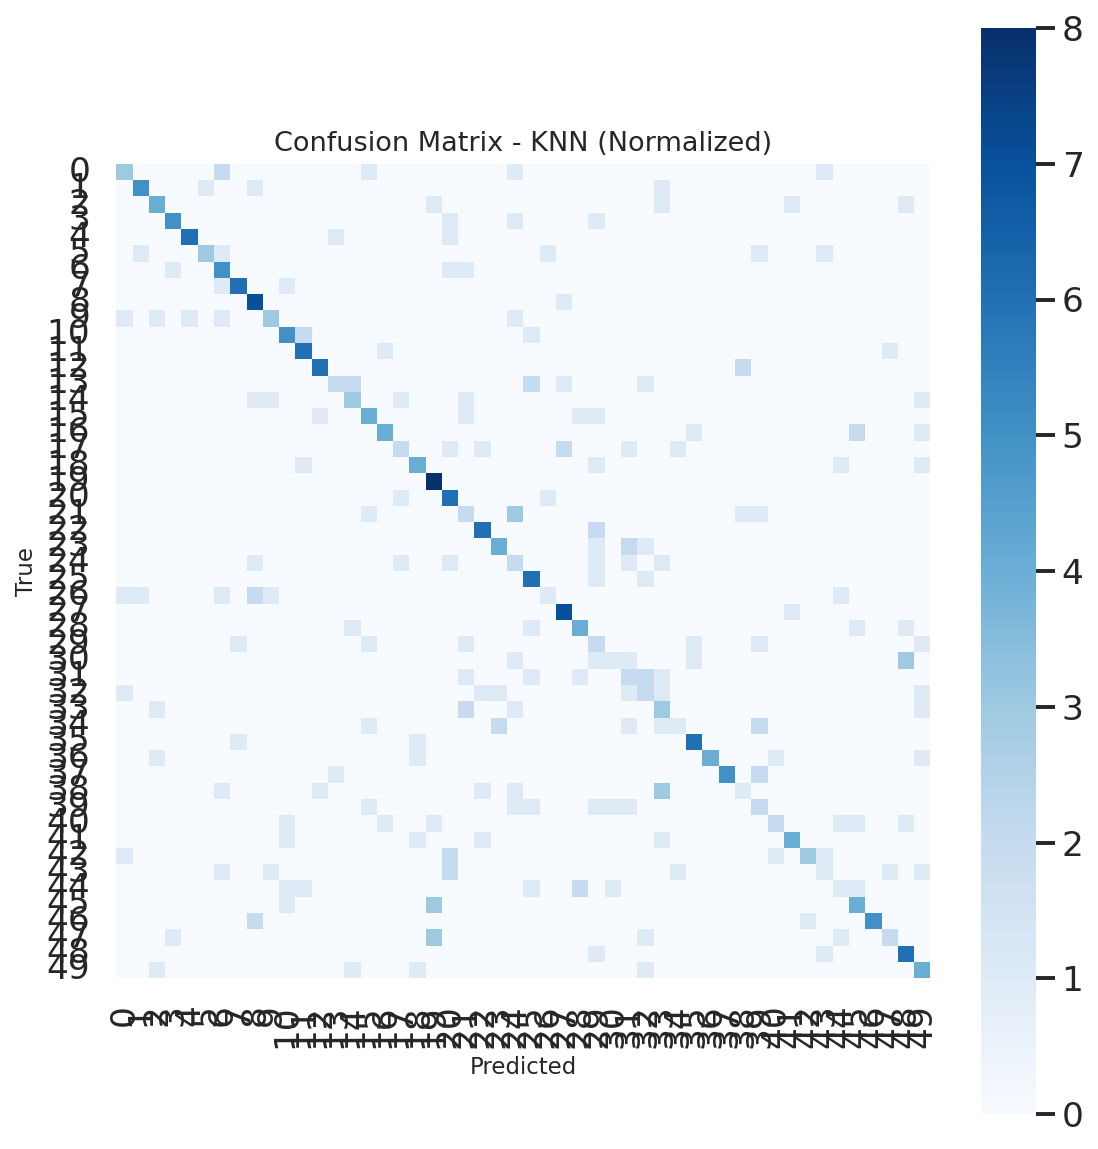

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




================ Logistic Regression on Selected =================
Train accuracy: 0.7700
Test  accuracy: 0.4375
Precision (macro): 0.4647
Recall    (macro): 0.4375
F1-score  (macro): 0.4356

Classification report (test set):
              precision    recall  f1-score   support

           0      0.300     0.375     0.333         8
           1      0.400     0.250     0.308         8
           2      0.286     0.250     0.267         8
           3      0.250     0.125     0.167         8
           4      0.700     0.875     0.778         8
           5      0.375     0.375     0.375         8
           6      0.375     0.375     0.375         8
           7      0.714     0.625     0.667         8
           8      0.500     0.625     0.556         8
           9      0.625     0.625     0.625         8
          10      1.000     1.000     1.000         8
          11      0.833     0.625     0.714         8
          12      0.857     0.750     0.800         8
          13    

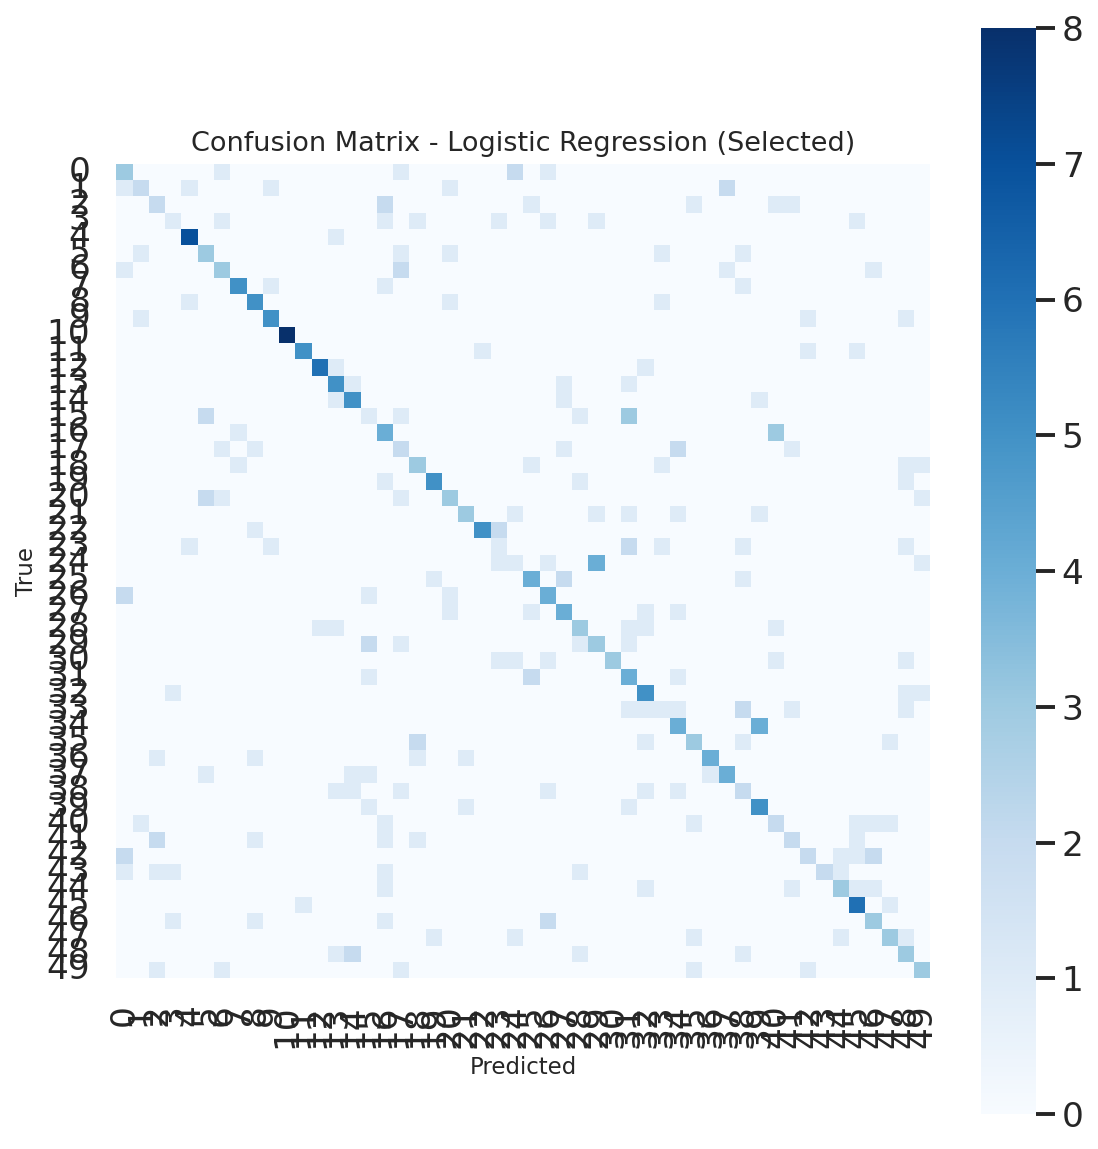


================ KNN on Selected =================
Train accuracy: 1.0000
Test  accuracy: 0.3275
Precision (macro): 0.3752
Recall    (macro): 0.3275
F1-score  (macro): 0.3314

Classification report (test set):
              precision    recall  f1-score   support

           0      0.600     0.375     0.462         8
           1      0.714     0.625     0.667         8
           2      0.667     0.250     0.364         8
           3      0.500     0.375     0.429         8
           4      0.417     0.625     0.500         8
           5      1.000     0.375     0.545         8
           6      0.375     0.375     0.375         8
           7      0.714     0.625     0.667         8
           8      0.167     0.250     0.200         8
           9      0.500     0.250     0.333         8
          10      0.750     0.750     0.750         8
          11      0.364     0.500     0.421         8
          12      0.400     0.250     0.308         8
          13      0.375     0.37

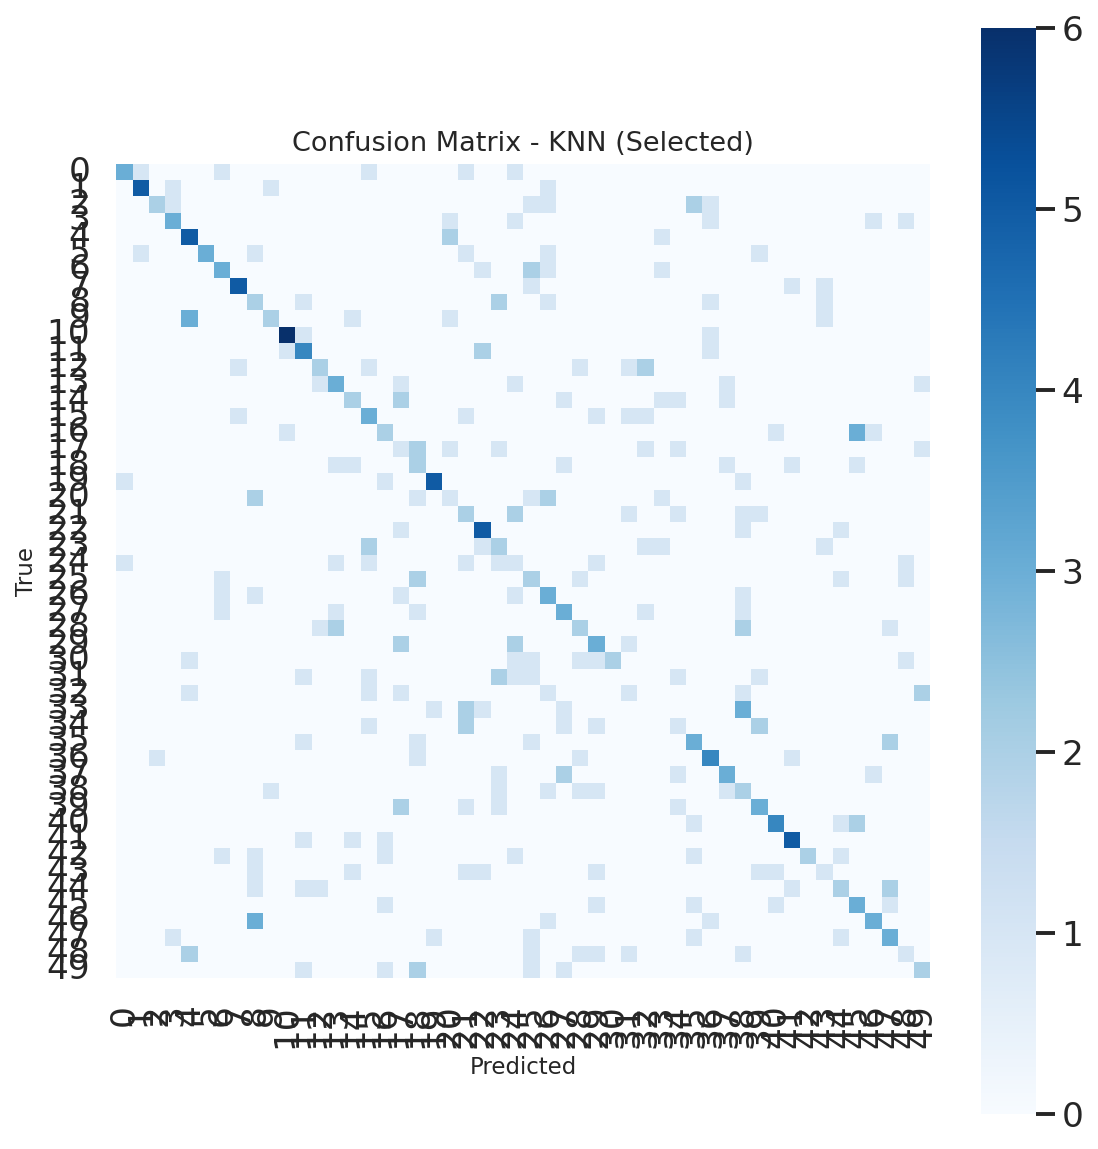

,Dataset,Model,Train_accuracy,Test_accuracy,Precision_macro,Recall_macro,F1_macro
0,Raw,Logistic Regression,0.930625,0.4350,0.466965,0.4350,0.430593
1,Raw,KNN,1.000000,0.3950,0.461107,0.3950,0.403053
2,Normalized,Logistic Regression,0.884375,0.5075,0.532686,0.5075,0.498359
3,Normalized,KNN,1.000000,0.4750,0.499739,0.4750,0.466404
4,Selected,Logistic Regression,0.770000,0.4375,0.464667,0.4375,0.435563
5,Selected,KNN,1.000000,0.3275,0.375197,0.3275,0.331426


In [ ]:
# 5. Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=1)
}

# 6. Train/Test split (one split per dataset, shared by all models)

def split_dataset(X, y, test_size=0.2, seed=42):
    return train_test_split(
        X,
        y,
        test_size=test_size,
        stratify=y,
        random_state=seed,
    )


Xr_tr, Xr_te, yr_tr, yr_te = split_dataset(X_raw, y_raw)
Xn_tr, Xn_te, yn_tr, yn_te = split_dataset(X_norm, y_norm)
Xs_tr, Xs_te, ys_tr, ys_te = split_dataset(X_sel, y_sel)



# 8. Run all models on all datasets

results = []

datasets = [
    ("Raw", Xr_tr, Xr_te, yr_tr, yr_te),
    ("Normalized", Xn_tr, Xn_te, yn_tr, yn_te),
    ("Selected", Xs_tr, Xs_te, ys_tr, ys_te),
]

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    for model_name, model in models.items():
        # Evaluate model and record metrics
        res = evaluate_model(
            model,
            X_train,
            X_test,
            y_train,
            y_test,
            model_name=model_name,
            dataset_name=dataset_name,
            plot_cm=True,
        )
        results.append(res)

# Convert results to DataFrame for a table
results_df = pd.DataFrame(results)
display(results_df)